# Data Preparation

ISIC for the training:

In [ ]:
import pandas as pd

groundtruth = pd.read_csv("../Datasets/ISIC2019/ISIC_2019_Training_Input/ISIC_2019_Training_GroundTruth.csv")
groundtruth = groundtruth.set_index("image")
indist = list(groundtruth.index)

In [ ]:
import os
from pathlib import Path
import numpy as np
from PIL import Image


X_data = []


#ood_data_darker = []
#ood_data_lighter = []
#ood_data = []

folder_dir = "../Datasets/ISIC2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input"
images = Path(folder_dir).glob("*.jpg")
count = 0
for i in list(images)[:10000]:#10000
    image = Image.open(i).convert("RGB")
    img_resize = np.array(image.resize((32, 32), Image.Resampling.LANCZOS)).ravel()
    if i.stem in indist:
        X_data.append(img_resize)
        count += 1
    # elif i.stem in oodist:
    # ood_data.append(img_resize)

In [ ]:
print("Count of inliers:",len(X_data))

Count of inliers: 10000


Fitz17k for the testing:

In [ ]:
ood_darker = []
ood_lighter = []
ood_data = []
darker_dir = "/Datasets/dataset/fitzpatrick 17k /Darker_Only/Darker_Skin_Tones"
lighter_dir = "/Datasets/dataset/fitzpatrick 17k /Lighter_only/Lighter_Skin_Tones"
ALL_dir = "/Datasets/dataset/fitzpatrick 17k /ALL_images/All images"

# Process images from the darker directory
darker_images = Path(darker_dir).glob("*.jpg")
for i in darker_images:
    image = Image.open(i).convert("RGB")
    img_resize = np.array(image.resize((32, 32), Image.Resampling.LANCZOS)).ravel()
    ood_darker.append(img_resize)
    ood_data.append(img_resize)

# Process images from the lighter directory
lighter_images = Path(lighter_dir).glob("*.jpg")
for i in list(lighter_images)[:3300]:#3300
    image = Image.open(i).convert("RGB")
    img_resize = np.array(image.resize((32, 32), Image.Resampling.LANCZOS)).ravel()
    ood_lighter.append(img_resize)
    ood_data.append(img_resize)

In [ ]:
ood_data = np.array(ood_data)
ood_lighter= np.array(ood_lighter)
ood_darker = np.array(ood_darker)

In [ ]:
len(X_data) , len(ood_data),len(ood_lighter) , len(ood_darker)

(10000, 4618, 3300, 1318)

In [ ]:
import numpy as np

X_array = np.array(X_data)
ood_array = np.array(ood_data)  #for all
ood_D_array = np.array(ood_darker) #for darker only
ood_L_array = np.array(ood_lighter) #for lighter only


Binary only 2 classes

In [ ]:
#Lighter category
y_ind = np.zeros(X_array.shape[0])  # not a OOD sample
#y_ood= np.ones(ood_array.shape[0])  # an OOD sample for all
#y_ood= np.ones(ood_D_array.shape[0]) # an OOD sample for darker only
y_ood= np.ones(ood_L_array.shape[0]) #an OOD sample for lighter only
X = np.concatenate([X_array, ood_L_array ])
y = np.concatenate([y_ind, y_ood])
print(X.shape, y.shape)

(13300, 3072) (13300,)


In [ ]:
#Darker Category

y_ind = np.zeros(X_array.shape[0])  # not a OOD sample
#y_ood= np.ones(ood_array.shape[0])  # an OOD sample for all
y_ood= np.ones(ood_D_array.shape[0]) # an OOD sample for darker only
#y_ood= np.ones(ood_L_array.shape[0]) #an OOD sample for lighter only
X = np.concatenate([X_array, ood_D_array ])
y = np.concatenate([y_ind, y_ood])
print(X.shape, y.shape)

(11318, 3072) (11318,)


In [ ]:
#ALL

y_ind = np.zeros(X_array.shape[0])  # not a OOD sample
y_ood= np.ones(ood_array.shape[0])  # an OOD sample for all
#y_ood= np.ones(ood_D_array.shape[0]) # an OOD sample for darker only
#y_ood= np.ones(ood_L_array.shape[0]) #an OOD sample for lighter only
X = np.concatenate([X_array, ood_array ])
y = np.concatenate([y_ind, y_ood])
print(X.shape, y.shape)

(14618, 3072) (14618,)


Multiclasses

In [ ]:
y_ind = np.zeros(X_array.shape[0])  # not an OOD sample
y_ood= np.ones(ood_array.shape[0]) *1 # an OOD sample
y_ood_D = np.ones(ood_D_array.shape[0]) * 2  # an OOD sample (darker)
y_ood_L = np.ones(ood_L_array.shape[0]) * 3  # an OOD sample (lighter)
X = np.concatenate([X_array, ood_D_array, ood_L_array])
y = np.concatenate([y_ind, y_ood_D, y_ood_L])
print(X.shape, y.shape)

(14618, 3072) (14618,)


In [ ]:
!pip install torchmetrics


In [ ]:
!pip install visdom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408194 sha256=b16ab1f2f05c819308abc6ca2ac47855b0c2e385c4e430f3f7baa6a81a40c1bc
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
Successfully built visdom


## Data Loading 

In [ ]:
import pandas as pd

groundtruth = pd.read_csv("../Datasets/ISIC2019/ISIC_2019_Training_Input/ISIC_2019_Training_GroundTruth.csv")
groundtruth = groundtruth.set_index("image")
indist = list(groundtruth.index)

In [ ]:
from pathlib import Path
import shutil

folder_dir_dark = "../Datasets/dataset/fitzpatrick 17k /Darker_Only/Darker_Skin_Tones"
folder_dir_light = "../Datasets/dataset/fitzpatrick 17k /Lighter_only/Lighter_Skin_Tones"
dest_all_dir = "../Datasets/dataset/All images"

# Collect image paths from both directories
images_dark = list(Path(folder_dir_dark).glob("*.jpg"))
images_light = list(Path(folder_dir_light).glob("*.jpg"))
images_all = images_dark + images_light

# Copy all images to the destination directory
#for i in all_images:
 #   shutil.copy(i, dest_all_dir)



In [ ]:
print (len(images_all))
print (len(images_dark))
print (len(images_light))

12222
1318
10904


In [ ]:
from pathlib import Path

folder_dir = "../Datasets/ISIC2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input"
images_ISIC = list(Path(folder_dir).glob("*.jpg"))

# Print the number of training images
print("Number of training images:", len(images_ISIC))


Number of training images: 25331


In [ ]:
from torchvision import transforms as tfs

transforms_train = [
    tfs.RandomHorizontalFlip(p=0.5),
    # tfs.RandomAutocontrast(p=0.5),
    # tfs.RandomAdjustSharpness(p=0.5, sharpness_factor=0.7),
    tfs.RandomAffine(0, scale=(0.7, 1.0)),
    tfs.Resize((16, 16)),
    # tfs.Grayscale(1),
    tfs.ToTensor(),
    # tfs.Normalize(mean=0.46 ,std=0.32)
]

transforms_test = [
    tfs.Resize((16, 16)),
    # tfs.Grayscale(1),
    tfs.ToTensor(),
    # tfs.Normalize(mean=0.46 ,std=0.32)
]

In [ ]:
#from torchvision.datasets import ImageFolder
#from torch.utils.data import DataLoader

#image_data_train = ImageFolder("../content/isic-2019/ISIC_2019_Training_Input", transform=tfs.Compose(transforms_train))


In [ ]:
#splitting the tain data
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

train_data_path = "../Datasets/ISIC2019/ISIC_2019_Training_Input"


image_data_train = ImageFolder(train_data_path, transform=tfs.Compose(transforms_train))

total_size = len(image_data_train)
train_size = int(0.8 * total_size)  # 80% for training
valid_size = total_size - train_size

# Split the dataset into training and validation sets
train_dataset, valid_dataset = random_split(image_data_train, [train_size, valid_size])

In [ ]:
#for ALL
image_data_test_ALL = ImageFolder( "/Datasets/dataset/ALL_images", transform=tfs.Compose(transforms_test))

In [ ]:
#for darker only
image_data_test_darker = ImageFolder( "../Datasets/dataset/fitzpatrick 17k /Darker_Only", transform=tfs.Compose(transforms_test))


#for lighter only
image_data_test_lighter = ImageFolder("../Datasets/dataset/fitzpatrick 17k /Lighter_only", transform=tfs.Compose(transforms_test))



In [ ]:
image_data_train.classes

['ISIC_2019_Training_Input']

In [ ]:
print(image_data_test_ALL.classes)
print(image_data_test_darker.classes)
print(image_data_test_lighter.classes)

['All images']
['Darker_Skin_Tones']
['Lighter_Skin_Tones']


### Data loaders

In [ ]:
#data_loader_train = DataLoader(image_data_train, batch_size=100, shuffle=True)  #ISIC as in distribution
data_loader_test_ALL = DataLoader(image_data_test_ALL, batch_size=100, shuffle=True) #Fitz as out distribution ALL
data_loader_test_Darker = DataLoader(image_data_test_darker, batch_size=100, shuffle=True) #darker only
data_loader_test_Lighter = DataLoader(image_data_test_lighter , batch_size=100 , shuffle=True ) #lighter only

In [ ]:
# Create DataLoaders for training and validation
batch_size = 100
data_loader_train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
data_loader_validation = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)


## RG Evaluation

## One Class SVM _RG

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import make_scorer, f1_sc## Performance metrics  ore
from sklearn import model_selection
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# Load the model from the file
with open('One_SVM_model.pkl', 'rb') as file:
    onesvm = pickle.load(file)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import aux
import importlib
import numpy as np


importlib.reload(aux)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
from sklearn.svm import OneClassSVM
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, stratify=y, random_state=42)

onesvm = OneClassSVM(kernel="rbf", gamma=0.00001,nu=0.01)
onesvm.fit(X_train)

OneClassSVM(gamma=1e-05, nu=0.01)

(array([6.000e+00, 3.000e+00, 8.000e+00, 3.000e+00, 6.000e+00, 1.000e+01,
        5.000e+00, 2.700e+01, 5.423e+03, 3.570e+02]),
 array([9.72303835e-06, 4.93442038e-02, 9.86786845e-02, 1.48013165e-01,
        1.97347646e-01, 2.46682127e-01, 2.96016608e-01, 3.45351088e-01,
        3.94685569e-01, 4.44020050e-01, 4.93354531e-01]),
 <BarContainer object of 10 artists>)

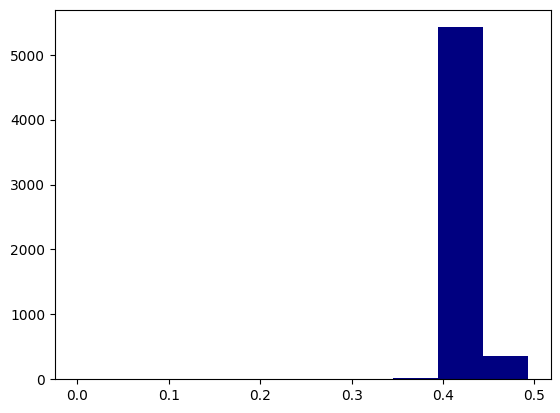

In [ ]:
plt.hist(onesvm.score_samples(X_test), color="Navy")

## Performance metrics  

In [ ]:
y_test[y_test == 1] = -1
y_test[y_test == 0] = 1
y_test

array([ 1., -1.,  1., ..., -1., -1.,  1.])

## Lighter only

In [ ]:
#auc

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

# Define a custom scoring function for ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score)

# Perform cross-validation with ROC AUC scoring
auc_scores_all = cross_val_score(onesvm, X_test, y_test, cv=5, scoring=roc_auc_scorer)
print("auc scores light:", auc_scores_all)
print("Mean auc score light:", auc_scores_all.mean())
print("Standard deviation of auc scores light:", auc_scores_all.std())


auc scores light: [0.50931337 0.49562582 0.51743269 0.5276257  0.50112787]
Mean auc score light: 0.5102250933157141
Standard deviation of auc scores light: 0.011414553365299595


In [ ]:
#f1 score
f1_scores1 = cross_val_score(onesvm, X_test, y_test, cv=5, scoring='f1')
print("F1 scores:", f1_scores1)
print("Mean F1 score:", f1_scores1.mean())
print("Standard deviation of F1 scores:", f1_scores1.std())

F1 scores: [0.65335235 0.68975069 0.66855524 0.68508287 0.68927336]
Mean F1 score: 0.6772029032847702
Standard deviation of F1 scores: 0.014204700299303792


## Darker only

In [ ]:
#auc


from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

# Define a custom scoring function for ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score)

# Perform cross-validation with ROC AUC scoring
auc_scores_all = cross_val_score(onesvm, X_test, y_test, cv=5, scoring=roc_auc_scorer)
print("auc scores dark:", auc_scores_all)
print("Mean auc score dark:", auc_scores_all.mean())
print("Standard deviation of auc scores dark:", auc_scores_all.std())


auc scores dark: [0.54009301 0.60359965 0.52022417 0.51873258 0.51623073]
Mean auc score dark: 0.5397760272703749
Standard deviation of auc scores dark: 0.03302434876420588


In [ ]:
#F1 score
f1_scores1 = cross_val_score(onesvm, X_test, y_test, cv=5, scoring='f1')
print("F1 scores:", f1_scores1)
print("Mean F1 score:", f1_scores1.mean())
print("Standard deviation of F1 scores:", f1_scores1.std())

F1 scores: [0.7267312  0.71981777 0.71982116 0.69465649 0.68659004]
Mean F1 score: 0.7095233311540607
Standard deviation of F1 scores: 0.015843550049450913


## For ALL

In [ ]:
#auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

# Define a custom scoring function for ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score)

# Perform cross-validation with ROC AUC scoring
auc_scores_all = cross_val_score(onesvm, X_test, y_test, cv=5, scoring=roc_auc_scorer)
print("auc scores all:", auc_scores_all)
print("Mean auc score all:", auc_scores_all.mean())
print("Standard deviation of auc scores all:", auc_scores_all.std())


auc scores all: [0.50931337 0.49562582 0.51743269 0.5276257  0.50112787]
Mean auc score all: 0.5102250933157141
Standard deviation of auc scores all: 0.011414553365299595


In [ ]:
#F1 score
f1_scores1 = cross_val_score(onesvm, X_test, y_test, cv=5, scoring='f1')
print("F1 scores:", f1_scores1)
print("Mean F1 score:", f1_scores1.mean())
print("Standard deviation of F1 scores:", f1_scores1.std())

F1 scores: [0.63364993 0.63846662 0.62962963 0.64621677 0.65231572]
Mean F1 score: 0.6400557348232299
Standard deviation of F1 scores: 0.00825262203677053


## Histograms

In [ ]:
anomaly_scores_inliers = onesvm.score_samples(X_test[y_test== 0])
anomaly_scores_darker = onesvm.score_samples(X_test[y_test== 2])
anomaly_scores_lighter= onesvm.score_samples(X_test[y_test == 3])

print("Number of inliers samples:", np.sum(y_test == 0))
print("Number of darker outliers samples:", np.sum(y_test == 2))
print("Number of lighter outliers samples:", np.sum(y_test == 3))

Number of inliers samples: 4001
Number of darker outliers samples: 527
Number of lighter outliers samples: 1320


In [ ]:
count_lighter_below_threshold = np.sum(np.abs(anomaly_scores_lighter) < 0.45)
count_darker_below_threshold = np.sum(np.abs(anomaly_scores_darker) < 0.45)
count_inliers_above_threshold = np.sum(np.abs(anomaly_scores_inliers) > 0.45)
print("Number of lighter outliers samples below 0.5:", count_lighter_below_threshold)
print("Number of darker outliers samples below 0.5:", count_darker_below_threshold)
print("Number of darker inliers samples above 0.5:", count_inliers_above_threshold)


Number of lighter outliers samples below 0.5: 1316
Number of darker outliers samples below 0.5: 521
Number of darker inliers samples above 0.5: 151


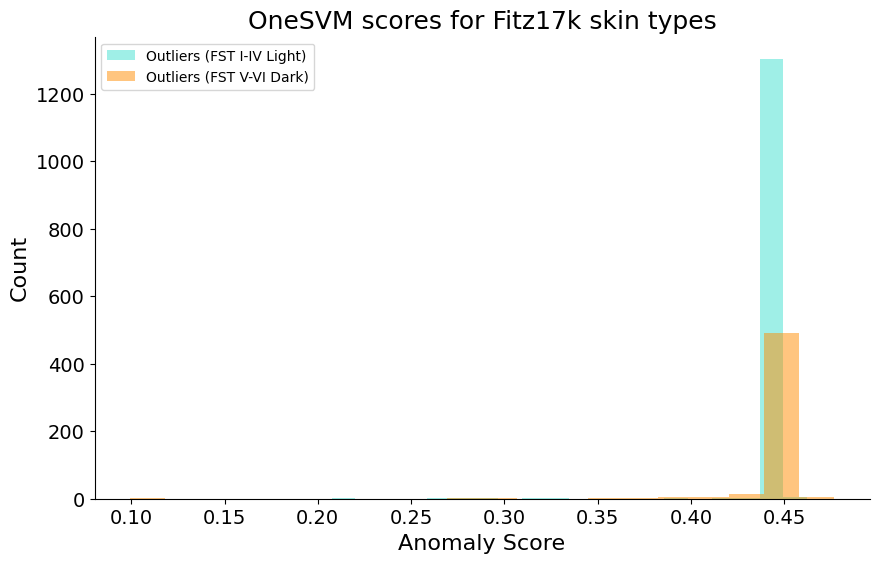

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and specify the size
plt.figure(figsize=(10, 6))

# Plot histograms for anomaly scores of each category
plt.hist(abs(anomaly_scores_lighter), bins=20, alpha=0.5, color="turquoise", label="Outliers (FST I-IV Light)")
plt.hist(abs(anomaly_scores_darker), bins=20, alpha=0.5, color="darkorange", label="Outliers (FST V-VI Dark)")

# Add titles and labels with increased font sizes
plt.title("OneSVM scores for Fitz17k skin types", fontsize=18)
plt.xlabel("Anomaly Score", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.legend()

# Increase the font size of tick labels on both axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()  # Get the current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Show the plot
plt.show()

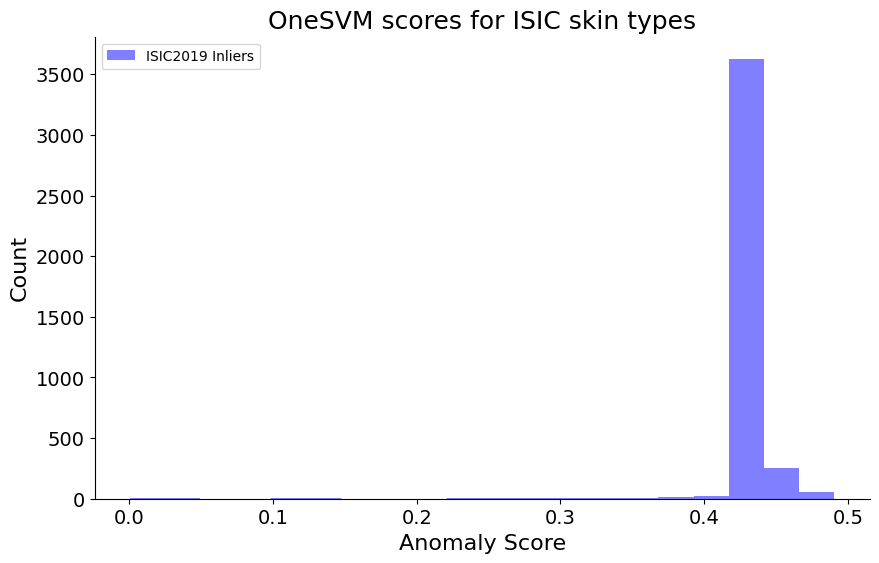

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and specify the size
plt.figure(figsize=(10, 6))

# Plot histograms for anomaly scores of each category
plt.hist(abs(anomaly_scores_inliers), bins=20, alpha=0.5, color="blue", label="ISIC2019 Inliers")
#plt.hist(abs(anomaly_scores_darker), bins=20, alpha=0.5, color="darkorange", label="Outliers (FST V-VI Dark)")

# Add titles and labels with increased font sizes
plt.title("OneSVM scores for ISIC skin types", fontsize=18)
plt.xlabel("Anomaly Score", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.legend()

# Increase the font size of tick labels on both axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()  # Get the current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Show the plot
plt.show()

## Isolation Forest_RG

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import aux
import importlib
import numpy as np

importlib.reload(aux)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
# Load the model from the file
with open('isolation_forest_model.pkl', 'rb') as file:
    best_clf = pickle.load(file)

### For All 

auc:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

# Define a custom scoring function for ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score)

# Perform cross-validation with ROC AUC scoring
auc_scores_all = cross_val_score(best_clf, X_test, y_test, cv=5, scoring=roc_auc_scorer)
print("auc scores all:", auc_scores_all)
print("Mean auc score all:", auc_scores_all.mean())
print("Standard deviation of auc scores all:", auc_scores_all.std())

auc scores all: [0.50931337 0.52837945 0.51348128 0.540607   0.53968405]
Mean auc score all: 0.5262930324023477
Standard deviation of auc scores all: 0.0129692868633459


In [ ]:
y_test[y_test == 1] = -1
y_test[y_test == 0] = 1
y_test

array([ 1., -1.,  1., ..., -1., -1.,  1.])

F1 score:

In [ ]:
f1_scores1 = cross_val_score(best_clf, X_test, y_test, cv=5, scoring='f1')
print("F1 scores:", f1_scores1)
print("Mean F1 score:", f1_scores1.mean())
print("Standard deviation of F1 scores:", f1_scores1.std())

F1 scores: [0.76848354 0.76989247 0.77498664 0.73318633 0.76584318]
Mean F1 score: 0.7624784318834912
Standard deviation of F1 scores: 0.014945456839712332


summary:

In [ ]:
print(
    classification_report(
        y_test,
        best_clf.predict(X_test),
        target_names=["Out-distribution", "In-distribution"],
    )
)

                  precision    recall  f1-score   support

Out-distribution       0.20      0.06      0.09      1847
 In-distribution       0.67      0.88      0.76      4001

        accuracy                           0.62      5848
       macro avg       0.44      0.47      0.43      5848
    weighted avg       0.52      0.62      0.55      5848



## Darker only 

auc:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

# Define a custom scoring function for ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score)

# Perform cross-validation with ROC AUC scoring
auc_scores_darker = cross_val_score(best_clf, X_test, y_test, cv=5, scoring=roc_auc_scorer)
print("auc scores darker:", auc_scores_darker)
print("Mean auc score darker:", auc_scores_darker.mean())
print("Standard deviation of auc scores darker:", auc_scores_darker.std())

auc scores darker: [0.47346126 0.47801434 0.49056669 0.44948821 0.47609108]
Mean auc score darker: 0.4735243159745933
Standard deviation of auc scores darker: 0.013378563385241177


F1 score:

In [ ]:
y_test[y_test == 1] = -1
y_test[y_test == 0] = 1
y_test

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
f1_scores_darker = cross_val_score(best_clf, X_test, y_test, cv=5, scoring='f1')
print("F1 scores darker:", f1_scores_darker)
print("Mean F1 score darker:", f1_scores_darker.mean())
print("Standard deviation of F1 scores darker:", f1_scores_darker.std())

F1 scores darker: [0.8915212  0.89944479 0.89068323 0.89912827 0.90135635]
Mean F1 score darker: 0.8964267666331601
Standard deviation of F1 scores darker: 0.004421768548569421


summary [dark only]

In [ ]:
print(
    classification_report(
        y_test,
        best_clf.predict(X_test),
        target_names=["Out-distribution", "In-distribution"],
    )
)

                  precision    recall  f1-score   support

Out-distribution       0.19      0.17      0.18       527
 In-distribution       0.89      0.90      0.90      4001

        accuracy                           0.82      4528
       macro avg       0.54      0.54      0.54      4528
    weighted avg       0.81      0.82      0.81      4528



## Lighter only

auc:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

# Define a custom scoring function for ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score)

# Perform cross-validation with ROC AUC scoring
auc_scores_lighter = cross_val_score(best_clf, X_test, y_test, cv=5, scoring=roc_auc_scorer)
print("auc scores lighter:", auc_scores_lighter)
print("Mean auc score lighter:", auc_scores_lighter.mean())
print("Standard deviation of auc scores lighter:", auc_scores_lighter.std())

auc scores lighter: [0.53125    0.52981061 0.5305092  0.52122134 0.52230987]
Mean auc score lighter: 0.5270202030607065
Standard deviation of auc scores lighter: 0.004328156370330682


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

# Define a custom scoring function for ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score)

# Perform cross-validation with ROC AUC scoring
auc_scores_lighter = cross_val_score(best_clf, X_test, y_test, cv=5, scoring=roc_auc_scorer)
print("auc scores lighter:", auc_scores_lighter)
print("Mean auc score lighter:", auc_scores_lighter.mean())
print("Standard deviation of auc scores lighter:", auc_scores_lighter.std())

auc scores lighter: [0.54091894 0.54301136 0.52777065 0.52414103 0.53220065]
Mean auc score lighter: 0.5336085245458444
Standard deviation of auc scores lighter: 0.007315078781402464


F1 score:

In [ ]:
y_test[y_test == 1] = -1
y_test[y_test == 0] = 1
y_test

array([ 1., -1.,  1., ...,  1.,  1.,  1.])

In [ ]:
f1_scores_lighter = cross_val_score(best_clf, X_test, y_test, cv=5, scoring='f1')
print("F1 scores lighter:", f1_scores_lighter)
print("Mean F1 score lighter:", f1_scores_lighter.mean())
print("Standard deviation of F1 scores lighter:", f1_scores_lighter.std())

F1 scores lighter: [0.80182232 0.80519481 0.7954023  0.80433542 0.81179138]
Mean F1 score lighter: 0.8037092471426975
Standard deviation of F1 scores lighter: 0.005300674973846504


Summary Light only:

In [ ]:
print(
    classification_report(
        y_test,
        best_clf.predict(X_test),
        target_names=["Out-distribution", "In-distribution"],
    )
)

                  precision    recall  f1-score   support

Out-distribution       0.13      0.05      0.08      1320
 In-distribution       0.74      0.87      0.80      4000

        accuracy                           0.67      5320
       macro avg       0.43      0.46      0.44      5320
    weighted avg       0.59      0.67      0.62      5320



# Histograms

In [ ]:
anomaly_scores_inliers = best_clf.score_samples(X_test[y_test== 0])
anomaly_scores_darker = best_clf.score_samples(X_test[y_test== 2])
anomaly_scores_lighter= best_clf.score_samples(X_test[y_test == 3])

print("Number of inliers samples:", np.sum(y_test == 0))
print("Number of darker outliers samples:", np.sum(y_test == 2))
print("Number of lighter outliers samples:", np.sum(y_test == 3))

Number of inliers samples: 4001
Number of darker outliers samples: 527
Number of lighter outliers samples: 1320


In [ ]:
count_lighter_below_threshold = np.sum(np.abs(anomaly_scores_lighter) < 0.5)
count_darker_below_threshold = np.sum(np.abs(anomaly_scores_darker) < 0.5)
count_inliers_above_threshold = np.sum(np.abs(anomaly_scores_inliers) > 0.5)
print("Number of lighter outliers samples below 0.5:", count_lighter_below_threshold)
print("Number of darker outliers samples below 0.5:", count_darker_below_threshold)
print("Number of darker inliers samples above 0.5:", count_inliers_above_threshold)


Number of lighter outliers samples below 0.5: 1109
Number of darker outliers samples below 0.5: 338
Number of darker inliers samples above 0.5: 1057


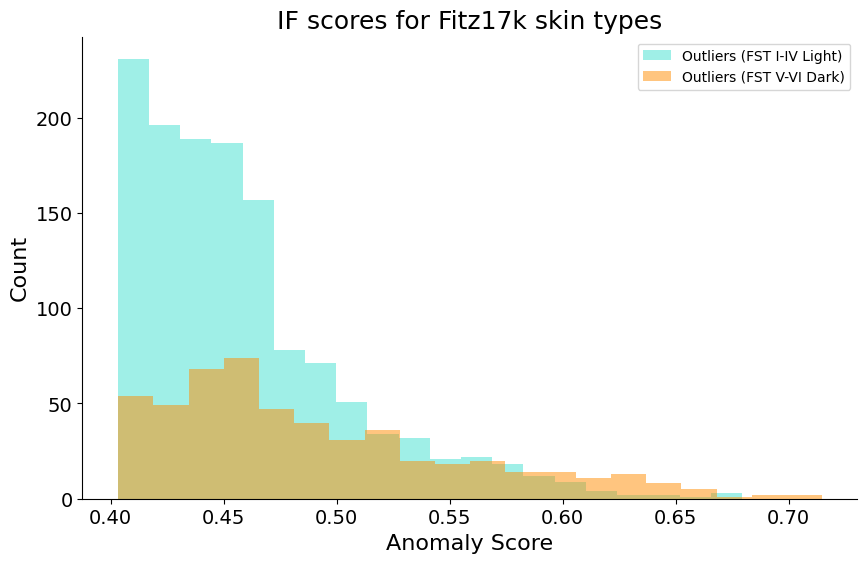

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and specify the size
plt.figure(figsize=(10, 6))

# Plot histograms for anomaly scores of each category
plt.hist(abs(anomaly_scores_lighter), bins=20, alpha=0.5, color="turquoise", label="Outliers (FST I-IV Light)")
plt.hist(abs(anomaly_scores_darker), bins=20, alpha=0.5, color="darkorange", label="Outliers (FST V-VI Dark)")

# Add titles and labels with increased font sizes
plt.title("IF scores for Fitz17k skin types", fontsize=18)
plt.xlabel("Anomaly Score", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.legend()

# Increase the font size of tick labels on both axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()  # Get the current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Show the plot
plt.show()


# AutoEncoder_RG

imports for the Ae

In [ ]:
import torch
from ae import Autoencoder
from torchsummary import summary


<All keys matched successfully>

## Loading the saved weights

In [ ]:
ae = Autoencoder()
ae.load_state_dict(torch.load("/content/autoencoder.pkl", map_location="cpu"))

<All keys matched successfully>

## Plot the train data econstructed samples

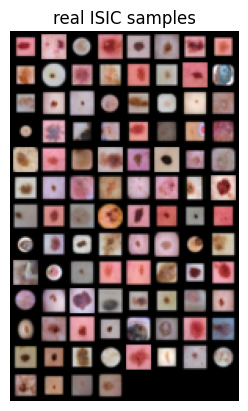

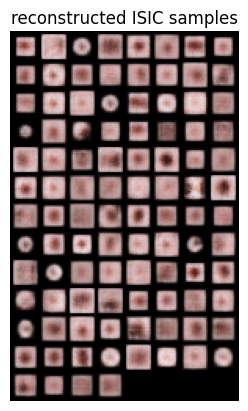

In [ ]:
from torch.autograd import Variable
import matplotlib.pyplot as plt
from aux import create_plot_window
from aux import imshow
import torchvision

dataiter = iter(data_loader_train)
images_ISIC, labels = next(dataiter)

plt.title("real ISIC samples")
imshow(torchvision.utils.make_grid(images_ISIC))

images = Variable(images_ISIC)
labels, decoded_imgs = ae(images)
plt.title("reconstructed ISIC samples")
imshow(torchvision.utils.make_grid(decoded_imgs.data))

## Plot the test data reconstructed samples

ALL

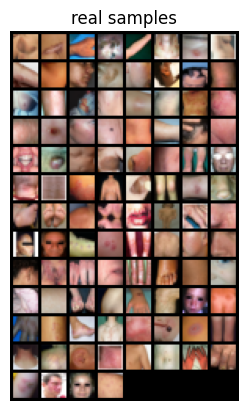

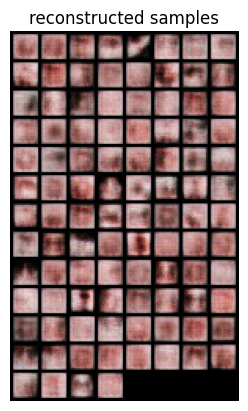

In [ ]:
from torch.autograd import Variable
import matplotlib.pyplot as plt

dataiter = iter(data_loader_test)#ALL
images, labels = next(dataiter)

plt.title("real samples")
imshow(torchvision.utils.make_grid(images))

images = Variable(images)
labels, decoded_imgs = ae(images)
plt.title("reconstructed samples")
imshow(torchvision.utils.make_grid(decoded_imgs.data))

In [ ]:
from torch.utils.data import DataLoader
import numpy as np

Lighter_samples = []
Darker_samples = []

for images, labels in data_loader_test:
    labels = labels.numpy()  # Convert labels tensor to a NumPy array
    if np.any(labels == 1):
        Darker_samples.append((images, labels))
    elif np.any(labels == 0):
        Lighter_samples.append((images, labels))
batch_size = 100
#Lighter_data_loader = DataLoader(Lighter_samples, batch_size=batch_size, shuffle=True)
Darker_data_loader = DataLoader(Darker_samples, batch_size=batch_size, shuffle=True)



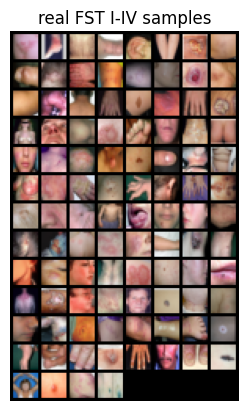

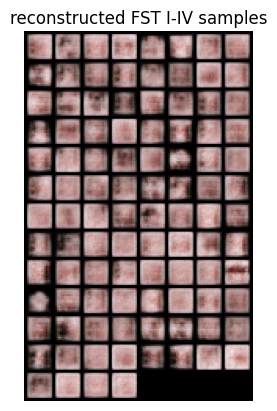

In [ ]:
from torch.autograd import Variable
import matplotlib.pyplot as plt
from aux import create_plot_window
from aux import imshow
import torchvision



dataiter = iter(data_loader_test_Lighter)#Lighter only
images_light, labels = next(dataiter)

plt.title("real FST I-IV samples")
imshow(torchvision.utils.make_grid(images_light))

images = Variable(images_light)
labels, decoded_imgs = ae(images_light)
plt.title("reconstructed FST I-IV samples")
imshow(torchvision.utils.make_grid(decoded_imgs.data))

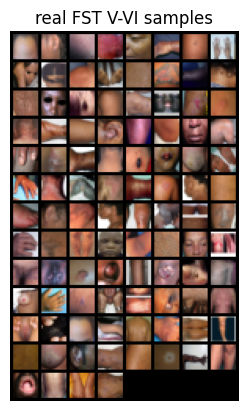

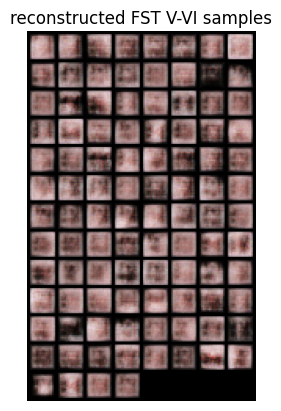

In [ ]:
dataiter = iter(data_loader_test_Darker)#Darker only
images_dark, labels = next(dataiter)

plt.title("real FST V-VI samples")
imshow(torchvision.utils.make_grid(images_dark))

images_dark= Variable(images_dark)
labels, decoded_imgs = ae(images_dark)
plt.title("reconstructed FST V-VI samples")
imshow(torchvision.utils.make_grid(decoded_imgs.data))

## Measuring the reconstruction error

In [ ]:
import torch.nn as nn
import torch
import numpy as np
import pandas as pd
mse = nn.MSELoss(reduction="sum")
mse_test = list()
labels_test = list()



In [ ]:
mse_train = list()
labels_train = list()
reconstructed_inputs_train = list()

for i, (inputs, labels) in enumerate(data_loader_train, 0):
    for j in range(inputs.shape[0]):
        # No need for Variable, work directly with tensors
        images_ISIC = inputs
        decoded_imgs = ae(images_ISIC)[1]#[1]
        mse_train.append(mse(decoded_imgs[j], images_ISIC[j]).item())
        labels_train.append(labels[j].detach().numpy().item())
        reconstructed_inputs_train.append(images_ISIC[j].detach().numpy())


In [ ]:
#For all
mse = nn.MSELoss(reduction="sum")
mse_test_All = list()
labels_test_All = list()
reconstructed_inputs_test_All = list()

for i, (inputs, labels) in enumerate(data_loader_test_ALL, 0):
    for j in range(inputs.shape[0]):
        # print(inputs.shape)
        images_all = inputs
        decoded_imgs = ae(images_all)[1]#[1]
        mse_test_All.append(mse(decoded_imgs[j], images_all[j]).item())
        labels_test_All.append(labels[j].detach().numpy().item())
        reconstructed_inputs_test_All.append(images_all[j].detach().numpy())



In [ ]:
#saving  re of ALL

import numpy as np

mse_train = np.array(mse_test_All)
labels_train = np.array(labels_test_All)
reconstructed_inputs_train = np.array(reconstructed_inputs_test_All)

np.save("mse_test_All.npy", mse_test_All)
np.save("labels_test_All.npy", labels_test_All)
np.save("reconstructed_inputs_test_All.npy", reconstructed_inputs_test_All)


In [ ]:
mse = nn.MSELoss(reduction="sum")
mse_test_dark = list()
labels_test_dark = list()
reconstructed_inputs_test_dark = list()
for i, (inputs, labels) in enumerate(data_loader_test_Darker, 0):
    for j in range(inputs.shape[0]):
        # print(inputs.shape)
        images_dark = inputs
        decoded_imgs = ae(images_dark)[1]#[1]
        mse_test_dark.append(mse(decoded_imgs[j], images_dark[j]).item())
        labels_test_dark.append(labels[j].detach().numpy().item())
        reconstructed_inputs_test_dark.append(images_dark[j].detach().numpy())

In [ ]:
mse = nn.MSELoss(reduction="sum")
mse_test_light = list()
labels_test_light = list()
reconstructed_inputs_test_light = list()

for i, (inputs, labels) in enumerate(data_loader_test_Lighter, 0):
    for j in range(inputs.shape[0]):
        # print(inputs.shape)
        images_light = inputs
        decoded_imgs = ae(images_light)[1]#[1]
        mse_test_light.append(mse(decoded_imgs[j], images_light[j]).item())
        labels_test_light.append(labels[j].detach().numpy().item())
        reconstructed_inputs_test_light.append(images_light[j].detach().numpy())

In [ ]:
#assert len(labels_test_All) == len(mse_test_All)
assert len(labels_test_dark) == len(mse_test_dark)
assert len(labels_test_light) == len(mse_test_light)
assert len(labels_train) == len(mse_train)

In [ ]:
#print(len(labels_test_All))
print(len(labels_test_dark))
print(len(labels_test_light))
print(len(labels_train))



1318
10904
20264


In [ ]:
import pandas as pd
import numpy as np

#error_df_All = pd.DataFrame({"re": mse_test_All, "labels": labels_test_All})#all
error_df_dark = pd.DataFrame({"re": mse_test_dark, "labels": labels_test_dark})
error_df_light = pd.DataFrame({"re": mse_test_light, "labels": labels_test_light})
error_df_train = pd.DataFrame({"re": mse_train, "labels": labels_train})

In [ ]:
error_df_dark["labels"] = 2  # Assign label 2 to dark
error_df_light["labels"] = 1  # Assign label 1 to light
error_df_train["labels"] = 0  # Assign label 0 to train

# Concatenate the DataFrames into one
error_df = pd.concat([error_df_train, error_df_light, error_df_dark], ignore_index=True)
error_df= error_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
#Concate train and test ALL as one dataframe
error_df_All["labels"] = 1
error_df_train["labels"] = 0

error_df1 = pd.concat([error_df_train,error_df_All], ignore_index=True)
error_df1= error_df1.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
error_df1

,re,labels
0,4.342609,0
1,4.265398,0
2,4.080728,0
3,4.513561,1
4,10.046871,0
...,...,...
32481,19.749836,1
32482,2.297856,0
32483,2.614737,0
32484,4.884062,0


In [ ]:
#print(error_df)
#print(error_df_dark)
#print(error_df_light)
error_df

,re,labels
0,4.342609,0
1,4.265398,0
2,4.080728,0
3,24.960615,2
4,10.046871,0
...,...,...
32481,44.714958,1
32482,2.297856,0
32483,2.614737,0
32484,4.884062,0


## Build a dummy threshold between the outliers distributions and the in-distribution samples


In [ ]:
from scipy.stats import gaussian_kde

x = np.arange(0, 100)
t = gaussian_kde(error_df.re[error_df.labels == 0].values)
#e = gaussian_kde(error_df.re[error_df.labels == 0].values)
f = gaussian_kde(error_df.re[error_df.labels == 2].values)
g = gaussian_kde(error_df.re[error_df.labels == 1].values)
idxs_L = np.argwhere(np.diff(np.sign(t(x) - g(x)))).flatten()#for light only
idxs_D = np.argwhere(np.diff(np.sign(t(x) - f(x)))).flatten()#for dark only


In [ ]:
print(idxs_L,idxs_D)

[7] [8]


In [ ]:
#thresholld for all
from scipy.stats import gaussian_kde

x = np.arange(0, 100)

t = gaussian_kde(error_df1.re[error_df1.labels == 0].values)
e = gaussian_kde(error_df1.re[error_df1.labels == 1].values)


idxs_all = np.argwhere(np.diff(np.sign(t(x) - e(x)))).flatten()#for all images

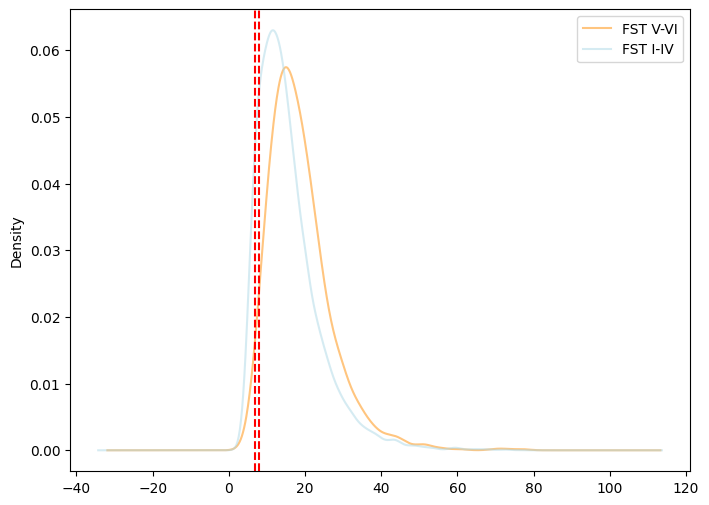

In [ ]:
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt


x = np.arange(0, 100)

# Calculate KDE for train loader
if (error_df.labels == 0).any():
    t = gaussian_kde(error_df.re[error_df.labels == 0].values)
else:
    t = None

# Calculate KDE for dark only
if (error_df.labels == 0).any():
    f = gaussian_kde(error_df.re[error_df.labels == 2].values)
else:
    f = None

# Calculate KDE for light only
if (error_df.labels == 1).any():
    g = gaussian_kde(error_df.re[error_df.labels == 1].values)
else:
    g = None

# Plotting the KDE


fig, ax = plt.subplots(figsize=(8, 6))

# Plot KDE for train loader
if t is not None:
    df_train = error_df[error_df.labels == 0]
    #ax = df_train["re"].plot(kind="kde", ax=ax, label="ISIC", alpha=0.5, color='green')

# Plot KDE for dark only
if f is not None:
    df_dark = error_df[error_df.labels == 2]
    ax = df_dark["re"].plot(kind="kde", ax=ax, label="FST V-VI", alpha=0.5, color='darkorange')

# Plot KDE for light only
if g is not None:
    df_light = error_df[error_df.labels == 1]
    ax = df_light["re"].plot(kind="kde", ax=ax, label="FST I-IV", alpha=0.5, color='lightblue')



#if len(idxs) > 0:
    #threshold_idx = idxs[1]
    ax.axvline(x=idxs_L, color='red', linestyle='--')
    ax.axvline(x=idxs_D, color='red', linestyle='--')



ax.legend()
plt.show()


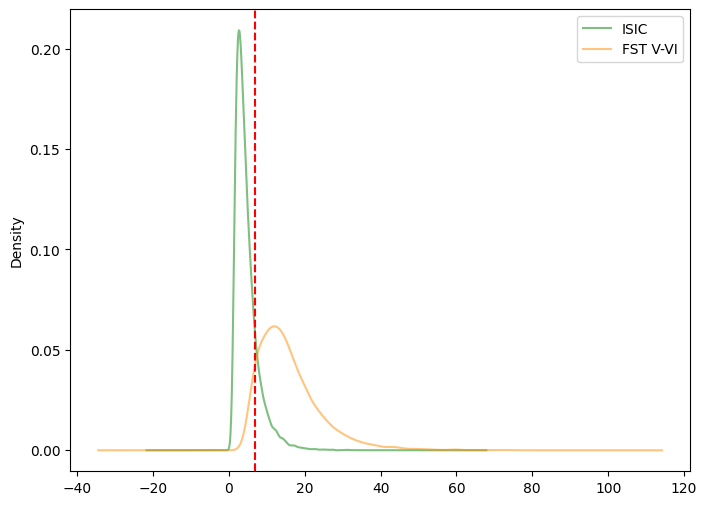

In [ ]:
#for ALL

from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt


x = np.arange(0, 100)

# Calculate KDE for train loader
if (error_df1.labels == 0).any():
    t = gaussian_kde(error_df1.re[error_df1.labels == 0].values)
else:
    t = None

# Calculate KDE for all
if (error_df1.labels == 0).any():
    f = gaussian_kde(error_df1.re[error_df1.labels == 1].values)
else:
    f = None



# Plotting the KDE


fig, ax = plt.subplots(figsize=(8, 6))

# Plot KDE for train loader
if t is not None:
    df_train = error_df1[error_df1.labels == 0]
    ax = df_train["re"].plot(kind="kde", ax=ax, label="ISIC", alpha=0.5, color='green')

# Plot KDE for dark only
if f is not None:
    df_all = error_df1[error_df1.labels == 1]
    ax = df_all["re"].plot(kind="kde", ax=ax, label="FST V-VI", alpha=0.5, color='darkorange')


ax.axvline(x=idxs_all, color='red', linestyle='--')




ax.legend()
plt.show()

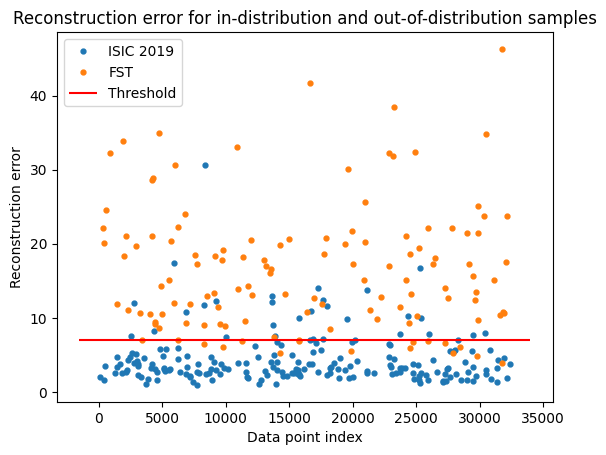

In [ ]:
#For all
import matplotlib.pyplot as plt
from aux import plot_re
plot_fraction = 0.01

sampled_error_df1 = error_df1.sample(frac=plot_fraction, random_state=42)

groups = sampled_error_df1.groupby("labels")
threshold_fixed = idxs_all

plot_re(groups, threshold_fixed)

In [ ]:
threshold_fixed_L = idxs_L
threshold_fixed_D = idxs_D

def apply_threshold(x):
    if (x <= threshold_fixed_L) & (x <= threshold_fixed_D):
        return 0
    else:
        return 1


#error_df["output"] = error_df["re"].apply(lambda x: 0 if x <= threshold_fixed else 1)
error_df['output'] = error_df['re'].apply(apply_threshold)
error_df #two different datafames for darker and lighter

,re,labels,output
0,4.342609,0,0
1,4.265398,0,0
2,4.080728,0,0
3,24.960615,2,1
4,10.046871,0,1
...,...,...,...
32481,44.714958,1,1
32482,2.297856,0,0
32483,2.614737,0,0
32484,4.884062,0,0


In [ ]:
threshold_fixed_L = idxs_L
threshold_fixed_D = idxs_D

def apply_threshold(x):
    if (x <= threshold_fixed_L) & (x <= threshold_fixed_D):
        return 0
    else:
        return 1


#error_df["output"] = error_df["re"].apply(lambda x: 0 if x <= threshold_fixed else 1)
error_df['output'] = error_df['re'].apply(apply_threshold)
error_df #two different datafames for darker and lighter

,re,labels,output
0,4.342609,0,0
1,4.265398,0,0
2,4.080728,0,0
3,24.960615,2,1
4,10.046871,0,1
...,...,...,...
32481,44.714958,1,1
32482,2.297856,0,0
32483,2.614737,0,0
32484,4.884062,0,0


In [ ]:
threshold_fixed= idxs_all

def apply_threshold(x):
    if (x <= threshold_fixed):
        return 0
    else:
        return 1


#error_df["output"] = error_df["re"].apply(lambda x: 0 if x <= threshold_fixed else 1)
error_df1['output'] = error_df1['re'].apply(apply_threshold)
error_df1 #two different datafames for darker and lighter

,re,labels,output
0,4.342609,0,0
1,4.265398,0,0
2,4.080728,0,0
3,4.513561,1,0
4,10.046871,0,1
...,...,...,...
32481,19.749836,1,1
32482,2.297856,0,0
32483,2.614737,0,0
32484,4.884062,0,0


###Plotting the histogram

In [ ]:
re_Lighter = error_df[(error_df['labels'] == 1) & (error_df['output'] == 1)]['re']
re_Darker = error_df[(error_df['labels'] == 2) & (error_df['output'] == 1)]['re']
re_Inlier = error_df[(error_df['labels'] == 0) & (error_df['output'] == 0)]['re']

# Print counts
print("Count of lighter:", len(re_Lighter))
print("Count of darker:", len(re_Darker))
print("Count of inlier:", len(re_Inlier))

Count of lighter: 9974
Count of darker: 1296
Count of inlier: 16935


In [ ]:
# Filter rows based on conditions
re_Lighter = error_df[(error_df['labels'] == 1) & (error_df['output'] == 1)]['re']
re_Darker = error_df[(error_df['labels'] == 2) & (error_df['output'] == 1)]['re']
re_Inlier = error_df[(error_df['labels'] == 0) & (error_df['output'] == 0)]['re']

# Print counts
print("Count of lighter:", len(re_Lighter))
print("Count of darker:", len(re_Darker))
print("Count of inlier:", len(re_Inlier))

Count of lighter: 9974
Count of darker: 1296
Count of inlier: 16935


In [ ]:
#plotting and counting all the re
# Filter rows based on conditions
re_Lighter_all = error_df[(error_df['labels'] == 1) ]['re']
re_Darker_all = error_df[(error_df['labels'] == 2) ]['re']
re_Inlier_all = error_df[(error_df['labels'] == 0) ]['re']

# Print counts
print("Count of re lighter without threshold:", len(re_Lighter_all))
print("Count of re darker without threshold:", len(re_Darker_all))
print("Count of re inlier without threshold:", len(re_Inlier_all))

Count of re lighter without threshold: 10904
Count of re darker without threshold: 1318
Count of re inlier without threshold: 20264


In [ ]:
#plotting and counting all the re
# Filter rows based on conditions
re_Lighter_bellow = error_df[(error_df['labels'] == 1) & (error_df['output'] == 0) ]['re']
re_Darker_bellow = error_df[(error_df['labels'] == 2)& (error_df['output'] == 0) ]['re']
re_Inlier_bellow = error_df[(error_df['labels'] == 0) &(error_df['output'] == 1) ]['re']

# Print counts
print("Count of re lighter bellow threshold:", len(re_Lighter_bellow))
print("Count of re darker bellow threshold:", len(re_Darker_bellow))
print("Count of re inlier above threshold:", len(re_Inlier_bellow))

Count of re lighter bellow threshold: 930
Count of re darker bellow threshold: 22
Count of re inlier above threshold: 3329


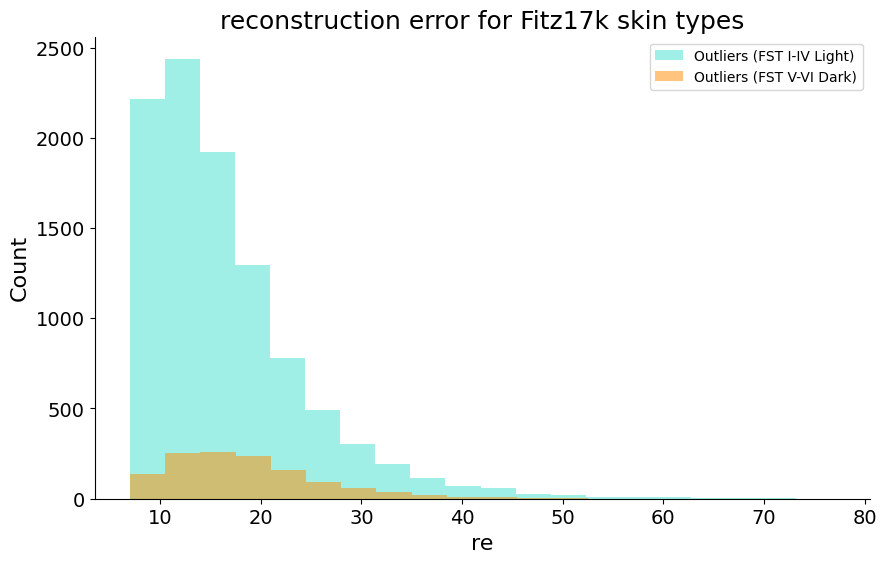

In [ ]:
import matplotlib.pyplot as plt





# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(abs(re_Lighter), bins=20, alpha=0.5, color="turquoise", label="Outliers (FST I-IV Light)")
plt.hist(abs(re_Darker), bins=20, alpha=0.5, color="darkorange", label="Outliers (FST V-VI Dark)")

# Add titles and labels

plt.xlabel("re",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.legend()
plt.title("reconstruction error for Fitz17k skin types",fontsize=18)
# Increase the font size of tick labels on both axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()  # Get the current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Show the plot
plt.show()


plotting re without threshold

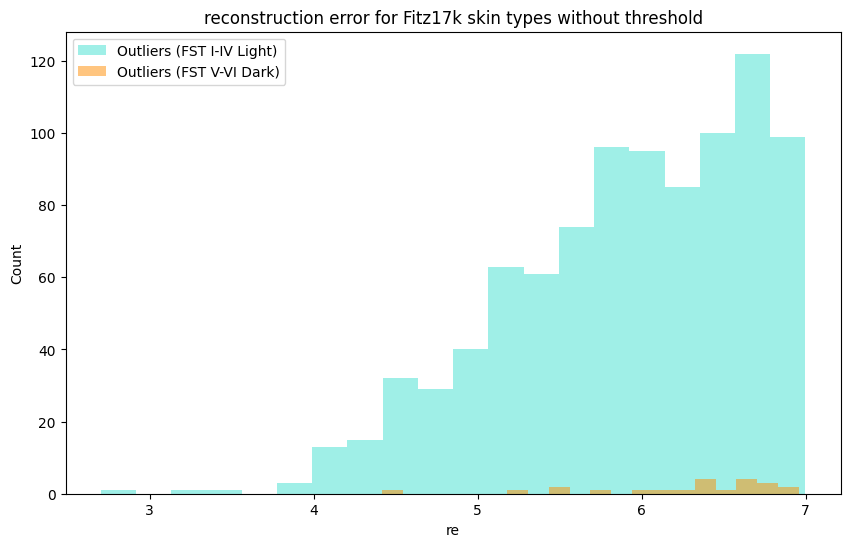

In [ ]:
import matplotlib.pyplot as plt





# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(abs(re_Lighter_bellow), bins=20, alpha=0.5, color="turquoise", label="Outliers (FST I-IV Light)")
plt.hist(abs(re_Darker_bellow), bins=20, alpha=0.5, color="darkorange", label="Outliers (FST V-VI Dark)")

# Add titles and labels
plt.title("Score Histograms for Different Categories")
plt.xlabel("re")
plt.ylabel("Count")
plt.legend()
plt.title("reconstruction error for Fitz17k skin types without threshold")
plt.show()

## the metrics over our thresholded AE model
AUC and F1 score

## Lighter only

In [ ]:
import torch.nn.functional as F
from torch import nn
import torch.optim as optim
import torchmetrics

device = "cuda" if torch.cuda.is_available() else "cpu"

ae = Autoencoder()
ae.to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(ae.parameters(), lr=0.0001, betas=(0.5, 0.999))

In [ ]:
from sklearn.model_selection import KFold
from torch.utils.data import ConcatDataset


dataset = ConcatDataset([ image_data_train , image_data_test_lighter])
epochs = 22


auc_scores = []
f1_scores = []


num_folds = 4
splits = KFold(n_splits=num_folds, shuffle=True, random_state=42)



for fold_idx, (train_idx, val_idx) in enumerate(splits.split(dataset)):
    nro_fold = fold_idx + 1
    print("Fold {}".format(nro_fold))

    train_data = [dataset[i] for i in train_idx]
    val_data = [dataset[i] for i in val_idx]

    # Create data loaders for training and validation data
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

   
    running_loss = 0.0

    # Training loop
    for epoch in range(epochs):
        for i, (inputs, _) in enumerate(train_loader, 0):
            inputs = inputs.to(device)

            # Forward Pass
            encoded, outputs = ae(inputs)
            loss = criterion(outputs, inputs)

            # Backward Pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 50 == 49:  # Print every 50 mini-batches
                print(f"[Fold {nro_fold}, Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 50:.3f}")
                running_loss = 0.0

    
    ae.eval()
    true_labels = []
    predicted_labels = []

    with torch.no_grad():
        for inputs, _ in val_loader:
            inputs = inputs.to(device)
            encoded, outputs = ae(inputs)
            predicted = (outputs > 0.5).float()

            true_labels.extend(inputs.cpu().numpy())
            predicted_labels.extend(predicted.cpu().numpy())

    # Calculate AUC and F1 score for this fold
    aucroc = torchmetrics.AUROC(task="binary")
    auc = aucroc(torch.tensor(true_labels), torch.tensor(predicted_labels))
    auc_scores.append(auc.item())

    metric = torchmetrics.classification.BinaryF1Score()
    f1 = metric(torch.tensor(true_labels), torch.tensor(predicted_labels))
    f1_scores.append(f1.item())

# Calculate the mean and standard deviation of AUC and F1 scores
mean_auc = np.mean(auc_scores)
std_auc = np.std(auc_scores)

mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)

print(f"Mean AUC: {mean_auc:.4f}, Std AUC: {std_auc:.4f}")
print(f"Mean F1 Score: {mean_f1:.4f}, Std F1 Score: {std_f1:.4f}")


Fold 1
[Fold 1, Epoch 1, Batch 50] Loss: 0.689
[Fold 1, Epoch 1, Batch 100] Loss: 0.682
[Fold 1, Epoch 1, Batch 150] Loss: 0.665
[Fold 1, Epoch 1, Batch 200] Loss: 0.656
[Fold 1, Epoch 1, Batch 250] Loss: 0.649
[Fold 1, Epoch 2, Batch 50] Loss: 0.925
[Fold 1, Epoch 2, Batch 100] Loss: 0.626
[Fold 1, Epoch 2, Batch 150] Loss: 0.607
[Fold 1, Epoch 2, Batch 200] Loss: 0.593
[Fold 1, Epoch 2, Batch 250] Loss: 0.585
[Fold 1, Epoch 3, Batch 50] Loss: 0.832
[Fold 1, Epoch 3, Batch 100] Loss: 0.574
[Fold 1, Epoch 3, Batch 150] Loss: 0.571
[Fold 1, Epoch 3, Batch 200] Loss: 0.569
[Fold 1, Epoch 3, Batch 250] Loss: 0.565
[Fold 1, Epoch 4, Batch 50] Loss: 0.814
[Fold 1, Epoch 4, Batch 100] Loss: 0.562
[Fold 1, Epoch 4, Batch 150] Loss: 0.564
[Fold 1, Epoch 4, Batch 200] Loss: 0.559
[Fold 1, Epoch 4, Batch 250] Loss: 0.557
[Fold 1, Epoch 5, Batch 50] Loss: 0.798
[Fold 1, Epoch 5, Batch 100] Loss: 0.554
[Fold 1, Epoch 5, Batch 150] Loss: 0.556
[Fold 1, Epoch 5, Batch 200] Loss: 0.554
[Fold 1, Epoch

<ipython-input-56-6d359246784e>:50: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  auc = aucroc(torch.tensor(true_labels), torch.tensor(predicted_labels))


Fold 2
[Fold 2, Epoch 1, Batch 50] Loss: 0.525
[Fold 2, Epoch 1, Batch 100] Loss: 0.526
[Fold 2, Epoch 1, Batch 150] Loss: 0.527
[Fold 2, Epoch 1, Batch 200] Loss: 0.524
[Fold 2, Epoch 1, Batch 250] Loss: 0.524
[Fold 2, Epoch 2, Batch 50] Loss: 0.757
[Fold 2, Epoch 2, Batch 100] Loss: 0.523
[Fold 2, Epoch 2, Batch 150] Loss: 0.527
[Fold 2, Epoch 2, Batch 200] Loss: 0.523
[Fold 2, Epoch 2, Batch 250] Loss: 0.522
[Fold 2, Epoch 3, Batch 50] Loss: 0.757
[Fold 2, Epoch 3, Batch 100] Loss: 0.524
[Fold 2, Epoch 3, Batch 150] Loss: 0.524
[Fold 2, Epoch 3, Batch 200] Loss: 0.524
[Fold 2, Epoch 3, Batch 250] Loss: 0.524
[Fold 2, Epoch 4, Batch 50] Loss: 0.753
[Fold 2, Epoch 4, Batch 100] Loss: 0.523
[Fold 2, Epoch 4, Batch 150] Loss: 0.526
[Fold 2, Epoch 4, Batch 200] Loss: 0.526
[Fold 2, Epoch 4, Batch 250] Loss: 0.522
[Fold 2, Epoch 5, Batch 50] Loss: 0.753
[Fold 2, Epoch 5, Batch 100] Loss: 0.524
[Fold 2, Epoch 5, Batch 150] Loss: 0.525
[Fold 2, Epoch 5, Batch 200] Loss: 0.523
[Fold 2, Epoch

### Darker only

In [ ]:
from sklearn.model_selection import KFold
from torch.utils.data import ConcatDataset


dataset = ConcatDataset([ image_data_train , image_data_test_darker])


epochs = 22


auc_scores = []
f1_scores = []

num_folds = 4
splits = KFold(n_splits=num_folds, shuffle=True, random_state=42)






for fold_idx, (train_idx, val_idx) in enumerate(splits.split(dataset)):
    nro_fold = fold_idx + 1
    print("Fold {}".format(nro_fold))

    train_data = [dataset[i] for i in train_idx]
    val_data = [dataset[i] for i in val_idx]

    # Create data loaders for training and validation data
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

    # Initialize running loss
    running_loss = 0.0

    # Training loop
    for epoch in range(epochs):
        for i, (inputs, _) in enumerate(train_loader, 0):
            inputs = inputs.to(device)

            # Forward Pass
            encoded, outputs = ae(inputs)
            loss = criterion(outputs, inputs)

            # Backward Pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 50 == 49:  # Print every 50 mini-batches
                print(f"[Fold {nro_fold}, Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 50:.3f}")
                running_loss = 0.0

    # After training, evaluate on the validation set
    ae.eval()
    true_labels = []
    predicted_labels = []

    with torch.no_grad():
        for inputs, _ in val_loader:
            inputs = inputs.to(device)
            encoded, outputs = ae(inputs)
            predicted = (outputs > 0.5).float()

            true_labels.extend(inputs.cpu().numpy())
            predicted_labels.extend(predicted.cpu().numpy())

    # Calculate AUC and F1 score for this fold
    aucroc = torchmetrics.AUROC(task="binary")
    auc = aucroc(torch.tensor(true_labels), torch.tensor(predicted_labels))
    auc_scores.append(auc.item())

    metric = torchmetrics.classification.BinaryF1Score()
    f1 = metric(torch.tensor(true_labels), torch.tensor(predicted_labels))
    f1_scores.append(f1.item())

# Calculate the mean and standard deviation of AUC and F1 scores
mean_auc = np.mean(auc_scores)
std_auc = np.std(auc_scores)

mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)

print(f"Mean AUC: {mean_auc:.4f}, Std AUC: {std_auc:.4f}")
print(f"Mean F1 Score: {mean_f1:.4f}, Std F1 Score: {std_f1:.4f}")


Fold 1
[Fold 1, Epoch 1, Batch 50] Loss: 0.486
[Fold 1, Epoch 1, Batch 100] Loss: 0.484
[Fold 1, Epoch 1, Batch 150] Loss: 0.484
[Fold 1, Epoch 1, Batch 200] Loss: 0.486
[Fold 1, Epoch 2, Batch 50] Loss: 0.485
[Fold 1, Epoch 2, Batch 100] Loss: 0.485
[Fold 1, Epoch 2, Batch 150] Loss: 0.487
[Fold 1, Epoch 2, Batch 200] Loss: 0.483
[Fold 1, Epoch 3, Batch 50] Loss: 0.487
[Fold 1, Epoch 3, Batch 100] Loss: 0.484
[Fold 1, Epoch 3, Batch 150] Loss: 0.487
[Fold 1, Epoch 3, Batch 200] Loss: 0.482
[Fold 1, Epoch 4, Batch 50] Loss: 0.485
[Fold 1, Epoch 4, Batch 100] Loss: 0.487
[Fold 1, Epoch 4, Batch 150] Loss: 0.484
[Fold 1, Epoch 4, Batch 200] Loss: 0.484
[Fold 1, Epoch 5, Batch 50] Loss: 0.484
[Fold 1, Epoch 5, Batch 100] Loss: 0.483
[Fold 1, Epoch 5, Batch 150] Loss: 0.487
[Fold 1, Epoch 5, Batch 200] Loss: 0.486
[Fold 1, Epoch 6, Batch 50] Loss: 0.484
[Fold 1, Epoch 6, Batch 100] Loss: 0.486
[Fold 1, Epoch 6, Batch 150] Loss: 0.484
[Fold 1, Epoch 6, Batch 200] Loss: 0.486
[Fold 1, Epoch 

### For All

In [ ]:
import torch.nn.functional as F
from torch import nn
import torch.optim as optim
import torchmetrics
from sklearn.model_selection import KFold
from torch.utils.data import ConcatDataset



dataset = ConcatDataset([ image_data_train , image_data_test_ALL ])
auc_scores = []
f1_scores = []
num_folds = 4
splits = KFold(n_splits=num_folds, shuffle=True, random_state=42)



epochs = 22

for fold_idx, (train_idx, val_idx) in enumerate(splits.split(dataset)):
    nro_fold = fold_idx + 1
    print("Fold {}".format(nro_fold))

    train_data = [dataset[i] for i in train_idx]
    val_data = [dataset[i] for i in val_idx]

    # Create data loaders for training and validation data
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

    # Initialize running loss
    running_loss = 0.0

    # Training loop
    for epoch in range(epochs):
        for i, (inputs, _) in enumerate(train_loader, 0):
            inputs = inputs.to(device)

            # Forward Pass
            encoded, outputs = ae(inputs)
            loss = criterion(outputs, inputs)

            # Backward Pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 50 == 49:  # Print every 50 mini-batches
                print(f"[Fold {nro_fold}, Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 50:.3f}")
                running_loss = 0.0

    # After training, evaluate on the validation set
    ae.eval()
    true_labels = []
    predicted_labels = []

    with torch.no_grad():
        for inputs, _ in val_loader:
            inputs = inputs.to(device)
            encoded, outputs = ae(inputs)
            predicted = (outputs > 0.5).float()

            true_labels.extend(inputs.cpu().numpy())
            predicted_labels.extend(predicted.cpu().numpy())

    # Calculate AUC and F1 score for this fold
    aucroc = torchmetrics.AUROC(task="binary")
    auc = aucroc(torch.tensor(true_labels), torch.tensor(predicted_labels))
    auc_scores.append(auc.item())

    metric = torchmetrics.classification.BinaryF1Score()
    f1 = metric(torch.tensor(true_labels), torch.tensor(predicted_labels))
    f1_scores.append(f1.item())

# Calculate the mean and standard deviation of AUC and F1 scores
mean_auc = np.mean(auc_scores)
std_auc = np.std(auc_scores)

mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)

print(f"Mean AUC: {mean_auc:.4f}, Std AUC: {std_auc:.4f}")
print(f"Mean F1 Score: {mean_f1:.4f}, Std F1 Score: {std_f1:.4f}")


Fold 1
[Fold 1, Epoch 1, Batch 50] Loss: 0.688
[Fold 1, Epoch 1, Batch 100] Loss: 0.675
[Fold 1, Epoch 1, Batch 150] Loss: 0.665
[Fold 1, Epoch 1, Batch 200] Loss: 0.657
[Fold 1, Epoch 1, Batch 250] Loss: 0.652
[Fold 1, Epoch 2, Batch 50] Loss: 1.059
[Fold 1, Epoch 2, Batch 100] Loss: 0.634
[Fold 1, Epoch 2, Batch 150] Loss: 0.620
[Fold 1, Epoch 2, Batch 200] Loss: 0.601
[Fold 1, Epoch 2, Batch 250] Loss: 0.586
[Fold 1, Epoch 3, Batch 50] Loss: 0.949
[Fold 1, Epoch 3, Batch 100] Loss: 0.568
[Fold 1, Epoch 3, Batch 150] Loss: 0.566
[Fold 1, Epoch 3, Batch 200] Loss: 0.560
[Fold 1, Epoch 3, Batch 250] Loss: 0.556
[Fold 1, Epoch 4, Batch 50] Loss: 0.915
[Fold 1, Epoch 4, Batch 100] Loss: 0.555
[Fold 1, Epoch 4, Batch 150] Loss: 0.554
[Fold 1, Epoch 4, Batch 200] Loss: 0.551
[Fold 1, Epoch 4, Batch 250] Loss: 0.550
[Fold 1, Epoch 5, Batch 50] Loss: 0.898
[Fold 1, Epoch 5, Batch 100] Loss: 0.549
[Fold 1, Epoch 5, Batch 150] Loss: 0.546
[Fold 1, Epoch 5, Batch 200] Loss: 0.546
[Fold 1, Epoch

## NN Softmax_RG

## **Lighter** only

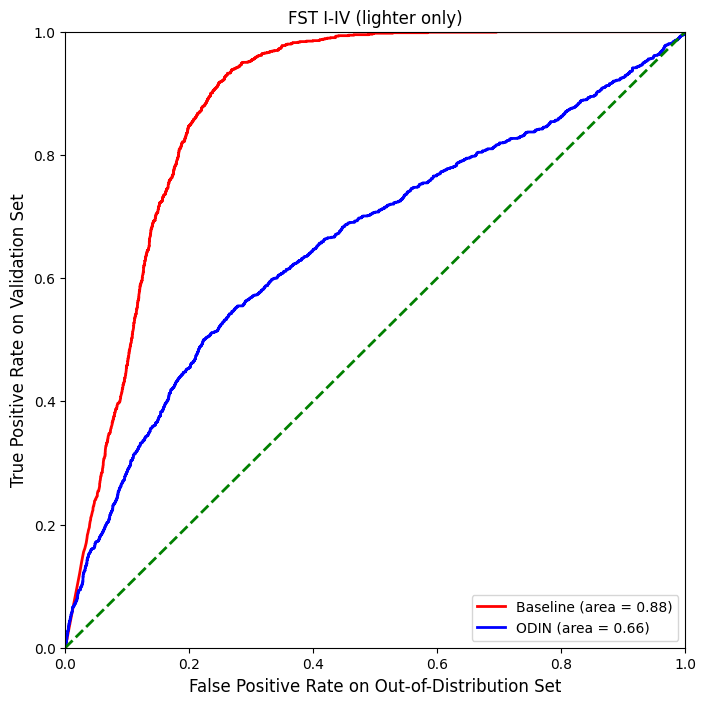

In [ ]:
import matplotlib.pyplot as plt
from odin import auroc, get_tpr_and_fpr
import numpy as np

optimal_temperature = 1
optimal_magnitude = 0.0002
optimal_delta = 0.9962658286094666



in_dist_files_L = ['/content/densenet121_Base_In_Lighter_Only.txt',  # baseline scores lighter only for [In]
                 "/content/densenet121_ODIN_200_0.0002_In_Lighter_Only.txt".format(optimal_temperature, optimal_magnitude)]  # odin scores lighter only
out_dist_files_L = ['/content/densenet121_Base_Out_Lighter_Only.txt',  # base line scores for lighter only for [out]
                  "/content/densenet121_ODIN_200_0.0002_Out_Lighter_Only.txt".format(optimal_temperature, optimal_magnitude)]  # ODIN scores for lighter only for [out]
labels = ['Baseline', 'ODIN']
colors = ['red', 'blue']

fig = plt.figure(figsize=(8, 8))
fig.patch.set_facecolor('white')
lw = 2
roc_data_lighter = []

for i in range(len(labels)):
    scores_in = np.loadtxt(in_dist_files_L[i])
    scores_out = np.loadtxt(out_dist_files_L[i])
    scores_in_train = scores_in[::2]
    scores_in_test = scores_in[1::2]
    scores_out_train = scores_out[::2]
    scores_out_test = scores_out[1::2]
    y_true = np.concatenate([np.repeat(1, scores_in_test.size), np.repeat(0, scores_out_test.size)])
    y_score = np.concatenate([scores_in_test, scores_out_test])
    fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1, drop_intermediate=False)
    roc_auc = auc(fpr, tpr)
    label = "{} (area = {:.2f})".format(labels[i], roc_auc)

    plt.plot(fpr, tpr, color=colors[i], lw=lw, label=label)




#roc_data_lighter.append({'Label': 0 , 'ROC AUC Lighter': roc_auc})


#roc_df_lighter = pd.DataFrame(roc_data_lighter)



plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate on Out-of-Distribution Set', fontsize=12)
plt.ylabel('True Positive Rate on Validation Set', fontsize=12)
plt.title("FST I-IV (lighter only)")
plt.legend(loc="lower right")
plt.show()

#fig.savefig(os.path.join('softmax_scores', 'DenseNet201_best_balanced_acc.svg'), format='svg', bbox_inches='tight', pad_inches=0)


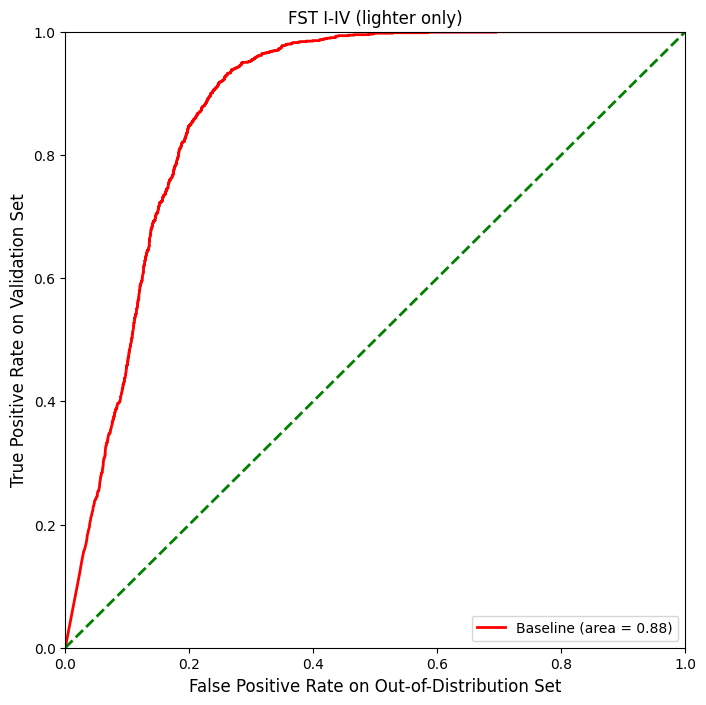

In [ ]:
#baseline scores subgroups
in_dist_files_L = ['/content/densenet121_Base_In_Lighter_Only.txt'.format(optimal_temperature, optimal_magnitude)]
out_dist_files_L = ['/content/densenet121_Base_Out_Lighter_Only.txt'.format(optimal_temperature, optimal_magnitude)]

labels = ['Baseline']
colors = ['red']

fig = plt.figure(figsize=(8, 8))
fig.patch.set_facecolor('white')
lw = 2


for i in range(len(labels)):
    scores_in = np.loadtxt(in_dist_files_L[i])
    scores_out = np.loadtxt(out_dist_files_L[i])
    scores_in_train = scores_in[::2]
    scores_in_test = scores_in[1::2]
    scores_out_train = scores_out[::2]
    scores_out_test = scores_out[1::2]
    y_true = np.concatenate([np.repeat(1, scores_in_test.size), np.repeat(0, scores_out_test.size)])
    y_score = np.concatenate([scores_in_test, scores_out_test])
    fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1, drop_intermediate=False)
    roc_auc = auc(fpr, tpr)
    label = "{} (area = {:.2f})".format(labels[i], roc_auc)

    plt.plot(fpr, tpr, color=colors[i], lw=lw, label=label)

plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate on Out-of-Distribution Set', fontsize=12)
plt.ylabel('True Positive Rate on Validation Set', fontsize=12)
plt.title("FST I-IV (lighter only)")
plt.legend(loc="lower right")
plt.show()

## **Darker** only

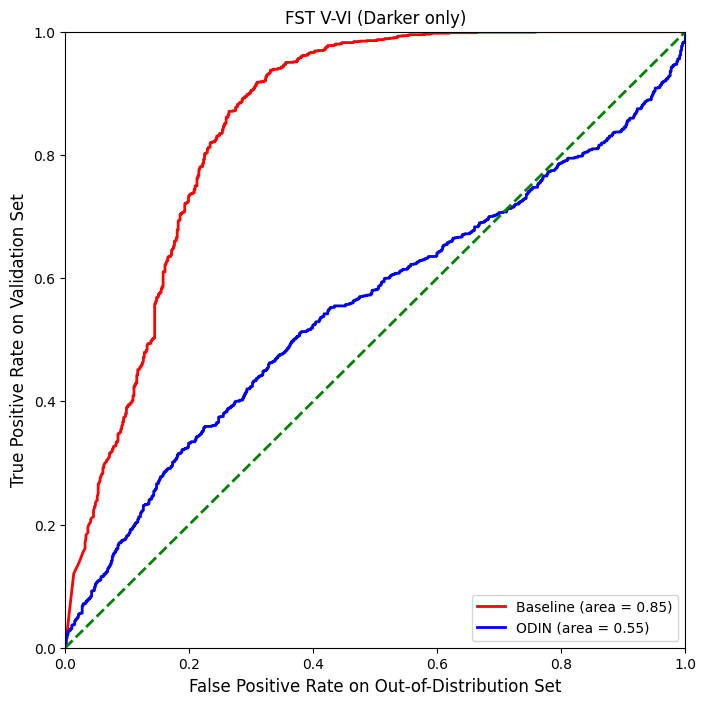

In [ ]:
## **Lighter** onlyimport matplotlib.pyplot as plt
from odin import auroc, get_tpr_and_fpr
import numpy as np

optimal_temperature = 200
optimal_magnitude = 0.0002
#optimal_delta = 0.90385
optimal_delta = 0.9962658286094666


in_dist_files_D = ['/content/densenet121_Base_In_Darker_only.txt',  # baseline scores lighter only for [In]
                 "/content/densenet121_ODIN_200_0.0002_In_Darker.txt".format(optimal_temperature, optimal_magnitude)]  # odin scores lighter only
out_dist_files_D = ["/content/densenet121_Base_Out_Darker_Only.txt",  # base line scores for lighter only for [out]
                  "/content/densenet121_ODIN_200_0.0002_Out_Darker.txt".format(optimal_temperature, optimal_magnitude)]  # ODIN scores for lighter only for [out]
labels = ['Baseline', 'ODIN']
colors = ['red', 'blue']

fig = plt.figure(figsize=(8, 8))
fig.patch.set_facecolor('white')
lw = 2

for i in range(len(labels)):
    scores_in = np.loadtxt(in_dist_files_D[i])
    scores_out = np.loadtxt(out_dist_files_D[i])
    scores_in_train = scores_in[::2]
    scores_in_test = scores_in[1::2]
    scores_out_train = scores_out[::2]
    scores_out_test = scores_out[1::2]
    y_true = np.concatenate([np.repeat(1, scores_in_test.size), np.repeat(0, scores_out_test.size)])
    y_score = np.concatenate([scores_in_test, scores_out_test])
    fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1, drop_intermediate=False)
    roc_auc = auc(fpr, tpr)
    label = "{} (area = {:.2f})".format(labels[i], roc_auc)
    plt.plot(fpr, tpr, color=colors[i], lw=lw, label=label)

plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate on Out-of-Distribution Set', fontsize=12)
plt.ylabel('True Positive Rate on Validation Set', fontsize=12)
plt.title("FST V-VI (Darker only)")
plt.legend(loc="lower right")
plt.show()

**ALL**

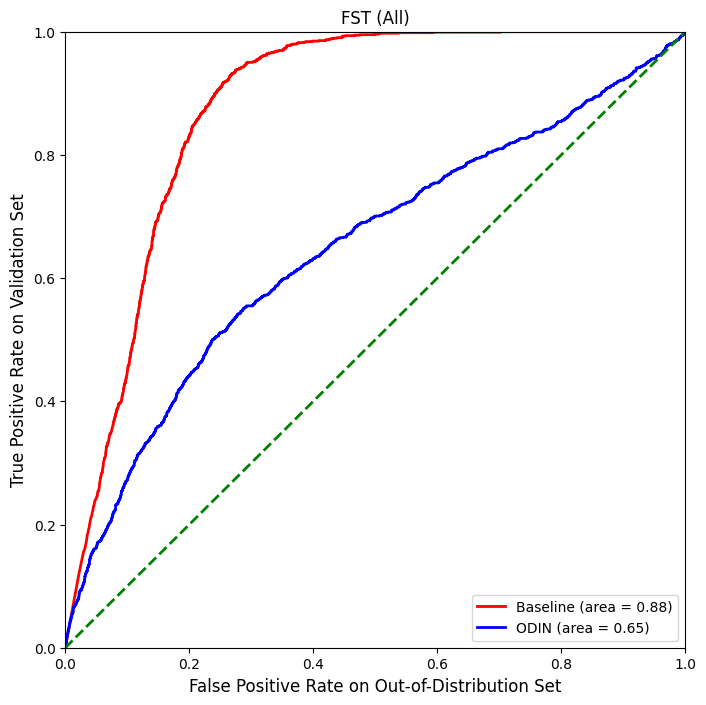

In [ ]:
import matplotlib.pyplot as plt
from odin import auroc, get_tpr_and_fpr

optimal_temperature = 200
optimal_magnitude = 0.0002
optimal_delta = 0.996266

in_dist_files_ALL = ['/content/densenet121_Base_In_ALL.txt',  # baseline scores lighter only for [In]
                 "/content/densenet121_ODIN_200_0.0002_In_ALL.txt".format(optimal_temperature, optimal_magnitude)]  # odin scores lighter only
out_dist_files_ALL = ['/content/densenet121_Base_Out_ALL.txt',  # base line scores for lighter only for [out]
                  "/content/densenet121_ODIN_200_0.0002_Out_ALL.txt".format(optimal_temperature, optimal_magnitude)]  # ODIN scores for lighter only for [out]
labels = ['Baseline', 'ODIN']
colors = ['red', 'blue']

fig = plt.figure(figsize=(8, 8))
fig.patch.set_facecolor('white')
lw = 2

for i in range(len(labels)):
    scores_in = np.loadtxt(in_dist_files_ALL[i])
    scores_out = np.loadtxt(out_dist_files_ALL[i])
    scores_in_train = scores_in[::2]
    scores_in_test = scores_in[1::2]
    scores_out_train = scores_out[::2]
    scores_out_test = scores_out[1::2]
    y_true = np.concatenate([np.repeat(1, scores_in_test.size), np.repeat(0, scores_out_test.size)])
    y_score = np.concatenate([scores_in_test, scores_out_test])
    fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1, drop_intermediate=False)
    roc_auc = auc(fpr, tpr)
    label = "{} (area = {:.2f})".format(labels[i], roc_auc)
    plt.plot(fpr, tpr, color=colors[i], lw=lw, label=label)

plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate on Out-of-Distribution Set', fontsize=12)
plt.ylabel('True Positive Rate on Validation Set', fontsize=12)
plt.title("FST (All)")
plt.legend(loc="lower right")
plt.show()


# Histograms

In [ ]:
import pandas as pd

# Load scores from your files
in_dist_files_L = ['/content/densenet121_Base_In_Lighter_Only.txt']
out_dist_files_L = ['/content/densenet121_Base_Out_Lighter_Only.txt']
in_dist_files_D = ['/content/densenet121_Base_In_Darker_only.txt']
out_dist_files_D = ['/content/densenet121_Base_Out_Darker_Only.txt']

# Read scores from files into Pandas Series
in_dist_scores_L = pd.Series([float(score) for score in open(in_dist_files_L[0]).readlines()])
out_dist_scores_L = pd.Series([float(score) for score in open(out_dist_files_L[0]).readlines()])
in_dist_scores_D = pd.Series([float(score) for score in open(in_dist_files_D[0]).readlines()])
out_dist_scores_D = pd.Series([float(score) for score in open(out_dist_files_D[0]).readlines()])

# Create labels for each set of scores
in_dist_labels_L = pd.Series([0] * len(in_dist_scores_L))
in_dist_labels_D = pd.Series([0] * len(in_dist_scores_D))

out_dist_labels_L = pd.Series([1] * len(out_dist_scores_L))
out_dist_labels_D = pd.Series([2] * len(out_dist_scores_D))





# Concatenate scores and labels into a DataFrame
df = pd.DataFrame({
    'Scores': pd.concat([in_dist_scores_L , in_dist_scores_D, out_dist_scores_L, out_dist_scores_D]),
    'Labels': pd.concat([in_dist_labels_L, in_dist_labels_D,out_dist_labels_L, out_dist_labels_D])
})

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the resulting DataFrame
df


,Scores,Labels
0,0.999318,2
1,0.819800,1
2,0.987357,1
3,1.000000,0
4,1.000000,0
...,...,...
17207,0.988635,1
17208,0.951698,1
17209,1.000000,1
17210,0.999990,0


In [ ]:
# Define the optimal threshold
#optimal_threshold = 0.9962658286094666
optimal_theshold = 1
# Create the "Output" column based on the condition
df['Output'] = (df['Scores'] < optimal_threshold).astype(int)

# Display the resulting DataFrame
df


,Scores,Labels,Output
0,0.999318,2,0
1,0.819800,1,1
2,0.987357,1,1
3,1.000000,0,0
4,1.000000,0,0
...,...,...,...
17207,0.988635,1,1
17208,0.951698,1,1
17209,1.000000,1,0
17210,0.999990,0,0


In [ ]:
#plotting and counting all the scores
# Filter rows based on conditions
base_Lighter = df[(df['Labels'] == 1) & (df['Output'] == 1) ]['Scores']
base_Darker = df[(df['Labels'] == 2)& (df['Output'] == 1) ]['Scores']
base_Inlier = df[(df['Labels'] == 0) &(df['Output'] == 0) ]['Scores']

# Print counts
print("Count of softmax scores of lighter samples bellow threshold:", len(base_Lighter))
print("Count of softmax scores of darker samples bellow threshold:", len(base_Darker))
print("Count of softmax scores of inlier above threshold:", len(base_Inlier))

Count of softmax scores of lighter samples bellow threshold: 8231
Count of softmax scores of darker samples bellow threshold: 919
Count of softmax scores of inlier above threshold: 4552


In [ ]:
#plotting and counting all the re
# Filter rows based on conditions
base_Lighter = df[(df['Labels'] == 1) & (df['Output'] == 0) ]['Scores']
base_Darker = df[(df['Labels'] == 2)& (df['Output'] == 0) ]['Scores']
base_Inlier = df[(df['Labels'] == 0) &(df['Output'] == 1) ]['Scores']

# Print counts
print("Count of softmax scores of lighter samples above threshold:", len(base_Lighter))
print("Count of softmax scores of darker samples above threshold:", len(base_Darker))
print("Count of softmax scores of inlier bellow threshold:", len(base_Inlier))

Count of softmax scores of lighter samples above threshold: 2673
Count of softmax scores of darker samples above threshold: 399
Count of softmax scores of inlier bellow threshold: 438


In [ ]:
#plotting and counting all the re
# Filter rows based on conditions
base_Lighter = df[(df['Labels'] == 1)  ]['Scores']
base_Darker = df[(df['Labels'] == 2) ]['Scores']
base_Inlier = df[(df['Labels'] == 0) ]['Scores']

# Print counts
print("Count of softmax scores of lighter samples :", len(base_Lighter))
print("Count of softmax scores of darker samples:", len(base_Darker))
print("Count of softmax scores of inlier :", len(base_Inlier))

Count of softmax scores of lighter samples : 10904
Count of softmax scores of darker samples: 1318
Count of softmax scores of inlier : 4990


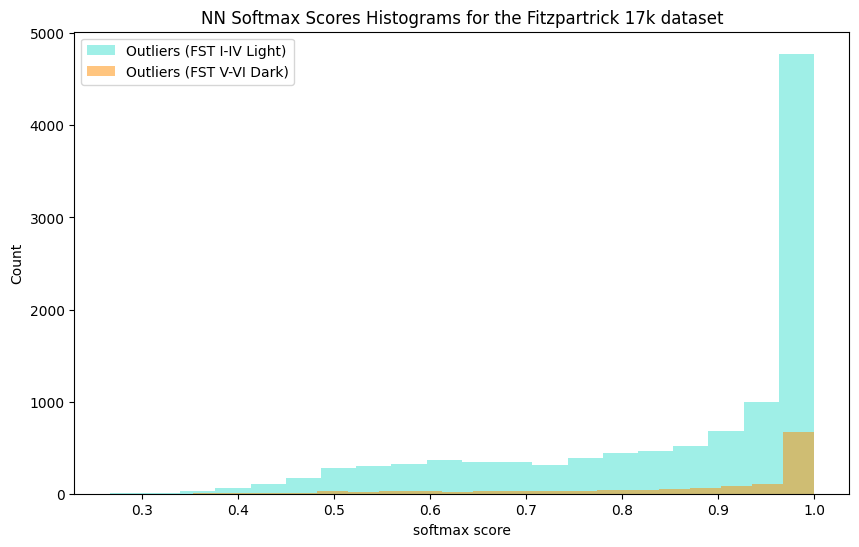

In [ ]:
import matplotlib.pyplot as plt





# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(abs(base_Lighter), bins=20, alpha=0.5, color="turquoise", label="Outliers (FST I-IV Light)")
plt.hist(abs(base_Darker), bins=20, alpha=0.5, color="darkorange", label="Outliers (FST V-VI Dark)")

# Add titles and labels
#plt.title("NN Softmax Scores Histograms for Different Categories")
plt.xlabel("softmax score")
plt.ylabel("Count")
plt.legend()
plt.title("NN Softmax Scores Histograms for the Fitzpartrick 17k dataset")
plt.show()

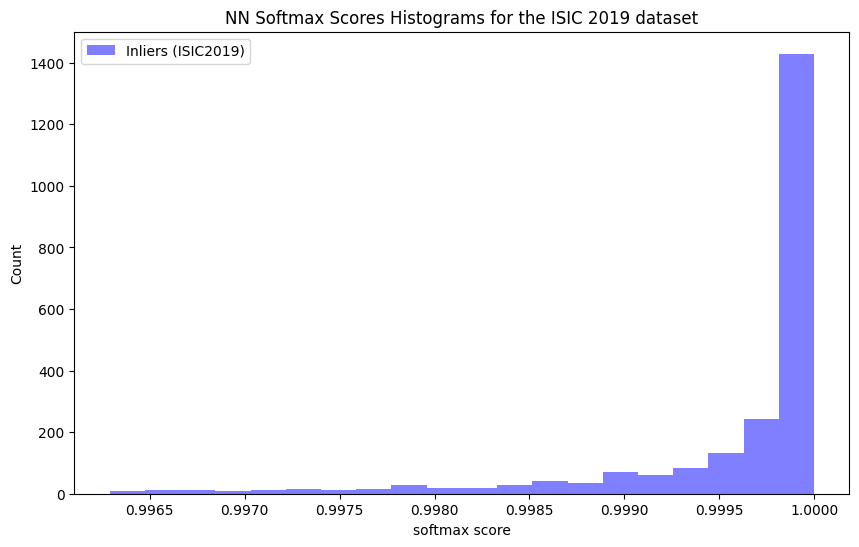

In [ ]:
import matplotlib.pyplot as plt





# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(abs(base_Inlier), bins=20, alpha=0.5, color="blue", label="Inliers (ISIC2019)")
#plt.hist(abs(base_Darker), bins=20, alpha=0.5, color="darkorange", label="Outliers (FST V-VI Dark)")

# Add titles and labels
#plt.title("NN Softmax Scores Histograms for Different Categories")
plt.xlabel("softmax score")
plt.ylabel("Count")
plt.legend()
plt.title("NN Softmax Scores Histograms for the ISIC 2019 dataset")
plt.show()

## Performance Metrics by folds

In [ ]:

#lighter only

import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score, classification_report

optimal_delta = 0.9962658286094666

# Load your baseline scores
scores_in = np.loadtxt('/content/densenet121_Base_In_Lighter_Only.txt')
scores_out = np.loadtxt('/content/densenet121_Base_Out_Lighter_Only.txt')

num_subsets = 4  # 4 folds

auc_values = []
F1_values = []

# Split the data into random subsets and calculate AUC for each subset
for i in range(num_subsets):
    # Shuffle the scores randomly
    np.random.shuffle(scores_in)
    np.random.shuffle(scores_out)

    # Split the shuffled scores into train and test sets
    scores_in_train = scores_in[:len(scores_in) // 2]
    scores_in_test = scores_in[len(scores_in) // 2:]
    scores_out_train = scores_out[:len(scores_out) // 2]
    scores_out_test = scores_out[len(scores_out) // 2:]

    # Calculate AUC
    y_true = np.concatenate([np.repeat(1, scores_in_test.size), np.repeat(0, scores_out_test.size)])
    y_score = np.concatenate([scores_in_test, scores_out_test])
    fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1, drop_intermediate=False)
    roc_auc = auc(fpr, tpr)
    auc_values.append(roc_auc)

    # Calculate F1-score using optimal_delta as the threshold
    y_true2 = np.concatenate([np.repeat(0, len(scores_in)), np.repeat(1, len(scores_out))])
    y_score2 = np.concatenate([scores_in, scores_out])
    y_pred = (y_score2 < optimal_delta).astype(int)  # Adjust the threshold here
    f1 = f1_score(y_true2, y_pred)
    F1_values.append(f1)

# Calculate the mean and standard deviation of the AUC and F1 scores
mean_auc = np.mean(auc_values)
std_auc = np.std(auc_values)
mean_F1 = np.mean(F1_values)
std_F1 = np.std(F1_values)

print("Mean AUC: {:.4f}, Mean F1 Score: {:.4f}".format(mean_auc, mean_F1))
print("Std Deviation of AUC: {:.4f}, Std Deviation of F1 Score: {:.4f}".format(std_auc, std_F1))


Mean AUC: 0.8807, Mean F1 Score: 0.8506
Std Deviation of AUC: 0.0016, Std Deviation of F1 Score: 0.0000


In [ ]:
#Darker only

import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score, classification_report

optimal_delta = 0.9962658286094666

# Load your baseline scores
scores_in = np.loadtxt('/content/densenet121_Base_In_Darker_only.txt')
scores_out = np.loadtxt('/content/densenet121_Base_Out_Darker_Only.txt')

num_subsets = 4  # 4 folds

auc_values = []
F1_values = []

# Split the data into random subsets and calculate AUC for each subset
for i in range(num_subsets):
    # Shuffle the scores randomly
    np.random.shuffle(scores_in)
    np.random.shuffle(scores_out)

    # Split the shuffled scores into train and test sets
    scores_in_train = scores_in[:len(scores_in) // 2]
    scores_in_test = scores_in[len(scores_in) // 2:]
    scores_out_train = scores_out[:len(scores_out) // 2]
    scores_out_test = scores_out[len(scores_out) // 2:]

    # Calculate AUC
    y_true = np.concatenate([np.repeat(1, scores_in_test.size), np.repeat(0, scores_out_test.size)])
    y_score = np.concatenate([scores_in_test, scores_out_test])
    fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1, drop_intermediate=False)
    roc_auc = auc(fpr, tpr)
    auc_values.append(roc_auc)

    # Calculate F1-score using optimal_delta as the threshold
    y_true2 = np.concatenate([np.repeat(0, len(scores_in)), np.repeat(1, len(scores_out))])
    y_score2 = np.concatenate([scores_in, scores_out])
    y_pred = (y_score2 < optimal_delta).astype(int)  # Adjust the threshold here
    f1 = f1_score(y_true2, y_pred)
    F1_values.append(f1)

# Calculate the mean and standard deviation of the AUC and F1 scores
mean_auc = np.mean(auc_values)
std_auc = np.std(auc_values)
mean_F1 = np.mean(F1_values)
std_F1 = np.std(F1_values)

print("Mean AUC: {:.4f}, Mean F1 Score: {:.4f}".format(mean_auc, mean_F1))
print("Std Deviation of AUC: {:.4f}, Std Deviation of F1 Score: {:.4f}".format(std_auc, std_F1))


Mean AUC: 0.8493, Mean F1 Score: 0.7484
Std Deviation of AUC: 0.0057, Std Deviation of F1 Score: 0.0000


In [ ]:
#For ALL 
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score, classification_report

optimal_delta = 0.9962658286094666

# Load your baseline scores
scores_in = np.loadtxt('/content/densenet121_Base_In_ALL.txt')
scores_out = np.loadtxt('/content/densenet121_Base_Out_ALL.txt')

num_subsets = 4  # 4 folds

auc_values = []
F1_values = []

# Split the data into random subsets and calculate AUC for each subset
for i in range(num_subsets):
    # Shuffle the scores randomly
    np.random.shuffle(scores_in)
    np.random.shuffle(scores_out)

    # Split the shuffled scores into train and test sets
    scores_in_train = scores_in[:len(scores_in) // 2]
    scores_in_test = scores_in[len(scores_in) // 2:]
    scores_out_train = scores_out[:len(scores_out) // 2]
    scores_out_test = scores_out[len(scores_out) // 2:]

    # Calculate AUC
    y_true = np.concatenate([np.repeat(1, scores_in_test.size), np.repeat(0, scores_out_test.size)])
    y_score = np.concatenate([scores_in_test, scores_out_test])
    fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1, drop_intermediate=False)
    roc_auc = auc(fpr, tpr)
    auc_values.append(roc_auc)

    # Calculate F1-score using optimal_delta as the threshold
    y_true2 = np.concatenate([np.repeat(0, len(scores_in)), np.repeat(1, len(scores_out))])
    y_score2 = np.concatenate([scores_in, scores_out])
    y_pred = (y_score2 < optimal_delta).astype(int)  # Adjust the threshold here
    f1 = f1_score(y_true2, y_pred)
    F1_values.append(f1)

# Calculate the mean and standard deviation of the AUC and F1 scores
mean_auc = np.mean(auc_values)
std_auc = np.std(auc_values)
mean_F1 = np.mean(F1_values)
std_F1 = np.std(F1_values)

print("Mean AUC: {:.4f}, Mean F1 Score: {:.4f}".format(mean_auc, mean_F1))
print("Std Deviation of AUC: {:.4f}, Std Deviation of F1 Score: {:.4f}".format(std_auc, std_F1))


Mean AUC: 0.8787, Mean F1 Score: 0.8468
Std Deviation of AUC: 0.0030, Std Deviation of F1 Score: 0.0000


# ODIN_RG

## Histograms

In [ ]:
import pandas as pd


in_dist_files_L = ['/content/densenet121_ODIN_200_0.0002_In_Lighter_Only.txt']
out_dist_files_L = ['/content/densenet121_ODIN_200_0.0002_Out_Lighter_Only.txt']
in_dist_files_D = ['/content/densenet121_ODIN_200_0.0002_In_Darker.txt']
out_dist_files_D = ['/content/densenet121_ODIN_200_0.0002_Out_Darker.txt']


in_dist_scores_L = pd.Series([float(score) for score in open(in_dist_files_L[0]).readlines()])
in_dist_scores_D = pd.Series([float(score) for score in open(in_dist_files_D[0]).readlines()])

out_dist_scores_L = pd.Series([float(score) for score in open(out_dist_files_L[0]).readlines()])
out_dist_scores_D = pd.Series([float(score) for score in open(out_dist_files_D[0]).readlines()])

# Create labels for each set of scores
in_dist_labels_L = pd.Series([0] * len(in_dist_scores_L))
in_dist_labels_D = pd.Series([1] * len(in_dist_scores_D))

out_dist_labels_L = pd.Series([2] * len(out_dist_scores_L))
out_dist_labels_D = pd.Series([3] * len(out_dist_scores_D))




# Concatenate scores and labels
in_dist_L_df = pd.concat([in_dist_scores_L, in_dist_labels_L], axis=1)
in_dist_L_df.columns = ['Scores', 'Labels']

in_dist_D_df = pd.concat([in_dist_scores_D, in_dist_labels_D], axis=1)
in_dist_D_df.columns = ['Scores', 'Labels']

out_dist_L_df = pd.concat([out_dist_scores_L, out_dist_labels_L], axis=1)
out_dist_L_df.columns = ['Scores', 'Labels']

out_dist_D_df = pd.concat([out_dist_scores_D, out_dist_labels_D], axis=1)
out_dist_D_df.columns = ['Scores', 'Labels']




df = pd.DataFrame({
    'Scores': pd.concat([in_dist_scores_L,in_dist_scores_D, out_dist_scores_L, out_dist_scores_D]),
    'Labels': pd.concat([in_dist_labels_L,in_dist_scores_D,out_dist_labels_L, out_dist_labels_D])
})

In [ ]:
out_dist_D_df["Labels"] = 3  # Assign label 2 to dark
out_dist_L_df["Labels"] = 2  # Assign label 1 to light
in_dist_L_df["Labels"] = 0  # Assign label 0 to train
in_dist_D_df["Labels"] = 1 # Assign label 0 to train

# Concatenate the DataFrames into one
df = pd.concat([in_dist_L_df,in_dist_D_df, out_dist_L_df, out_dist_D_df], ignore_index=True)
df= df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df

,Scores,Labels
0,0.176261,2
1,0.178890,2
2,0.175219,2
3,0.180510,2
4,0.176538,1
...,...,...
16544,0.177684,2
16545,0.174562,2
16546,0.198327,2
16547,0.177203,0


In [ ]:
# Define the optimal threshold
optimal_threshold =  0.1799 #0.197895 #0.172632

# Create the "Output" column based on the condition
df['Output'] = (df['Scores'] < optimal_threshold).astype(int)

# Display the resulting DataFrame
df

,Scores,Labels,Output
0,0.176261,2,1
1,0.178890,2,1
2,0.175219,2,1
3,0.180510,2,0
4,0.176538,1,1
...,...,...,...
16544,0.177684,2,1
16545,0.174562,2,1
16546,0.198327,2,0
16547,0.177203,0,1


In [ ]:
#plotting and counting all the re
# Filter rows based on conditions
ODIN_Lighter = df[(df['Labels'] == 2) & (df['Output'] == 1) ]['Scores']
ODIN_Darker = df[(df['Labels'] == 3)& (df['Output'] == 1) ]['Scores']
ODIN_Inlier = df[(df['Labels'] == 0) &(df['Output'] == 0) ]['Scores']

# Print counts
print("Count of ODIN scores of lighter samples bellow threshold:", len(ODIN_Lighter))
print("Count of ODIN scores of darker samples bellow threshold:", len(ODIN_Darker))
print("Count of ODIN scores of inlier above threshold:", len(ODIN_Inlier))

Count of ODIN scores of lighter samples bellow threshold: 8580
Count of ODIN scores of darker samples bellow threshold: 957
Count of ODIN scores of inlier above threshold: 992


In [ ]:
#plotting and counting all the re
# Filter rows based on conditions
ODIN_Lighter = df[(df['Labels'] == 1) & (df['Output'] == 1) ]['Scores']
ODIN_Darker = df[(df['Labels'] == 2)& (df['Output'] == 1) ]['Scores']
ODIN_Inlier = df[(df['Labels'] == 0) &(df['Output'] == 0) ]['Scores']

# Print counts
print("Count of ODIN scores of lighter samples bellow threshold:", len(ODIN_Lighter))
print("Count of ODIN scores of darker samples bellow threshold:", len(ODIN_Darker))
print("Count of ODIN scores of inlier above threshold:", len(ODIN_Inlier))

Count of ODIN scores of lighter samples bellow threshold: 8580
Count of ODIN scores of darker samples bellow threshold: 957
Count of ODIN scores of inlier above threshold: 992


In [ ]:
ODIN_Lighter = df[(df['Labels'] == 2) & (df['Output'] == 0) ]['Scores']
ODIN_Darker = df[(df['Labels'] == 3)& (df['Output'] == 0) ]['Scores']
ODIN_Inlier = df[(df['Labels'] == 0) &(df['Output'] == 1) ]['Scores']

# Print counts
print("Count of ODIN scores of lighter samples above threshold:", len(ODIN_Lighter))
print("Count of ODIN scores of darker samples above threshold:", len(ODIN_Darker))
print("Count of ODIN scores of inlier bellow threshold:", len(ODIN_Inlier))

Count of ODIN scores of lighter samples above threshold: 1661
Count of ODIN scores of darker samples above threshold: 361
Count of ODIN scores of inlier bellow threshold: 1503


In [ ]:
#plotting and counting all the re
# Filter rows based on conditions
ODIN_Lighter = df[(df['Labels'] == 2)  ]['Scores']
ODIN_Darker = df[(df['Labels'] == 3) ]['Scores']
ODIN_Inlier = df[(df['Labels'] == 0) ]['Scores']

# Print counts
print("Count of ODIN scores of lighter samples :", len(ODIN_Lighter))
print("Count of ODIN scores of darker samples:", len(ODIN_Darker))
print("Count of ODIN scores of inlier :", len(ODIN_Inlier))

Count of ODIN scores of lighter samples : 10241
Count of ODIN scores of darker samples: 1318
Count of ODIN scores of inlier : 2495


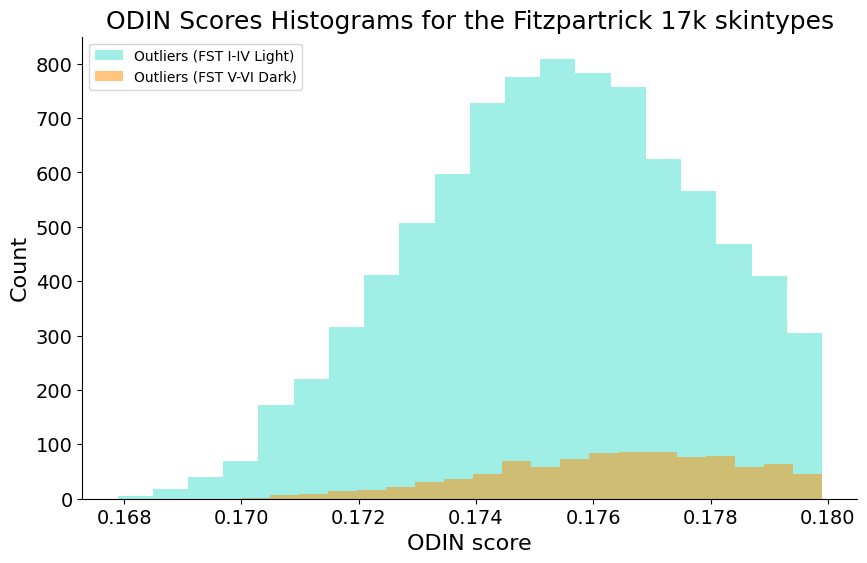

In [ ]:
import matplotlib.pyplot as plt





# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(abs(ODIN_Lighter), bins=20, alpha=0.5, color="turquoise", label="Outliers (FST I-IV Light)")
plt.hist(abs(ODIN_Darker), bins=20, alpha=0.5, color="darkorange", label="Outliers (FST V-VI Dark)")

# Add titles and labels
#plt.title("NN Softmax Scores Histograms for Different Categories")
plt.xlabel("ODIN score",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.legend()
plt.title("ODIN Scores Histograms for the Fitzpartrick 17k skintypes",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()  # Get the current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

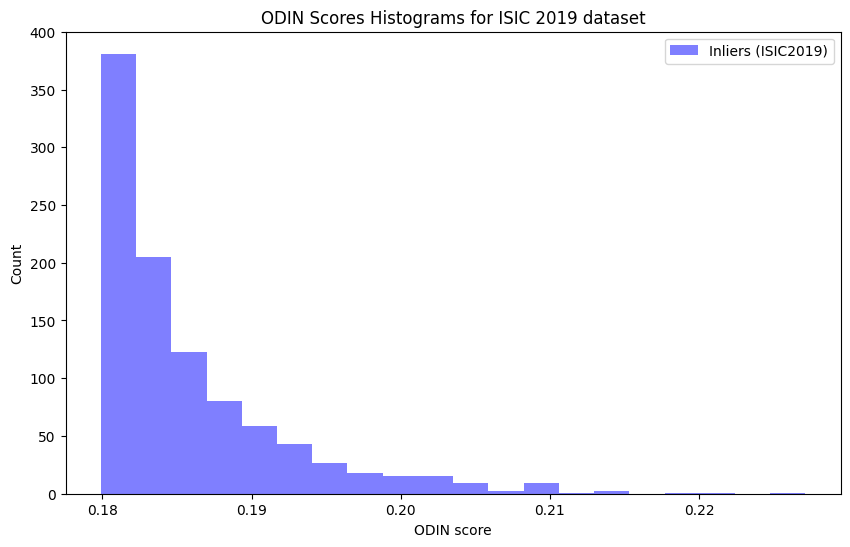

In [ ]:
import matplotlib.pyplot as plt





# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(abs(ODIN_Inlier), bins=20, alpha=0.5, color="blue", label="Inliers (ISIC2019)")
#plt.hist(abs(base_Darker), bins=20, alpha=0.5, color="darkorange", label="Outliers (FST V-VI Dark)")

# Add titles and labels
#plt.title("NN Softmax Scores Histograms for Different Categories")
plt.xlabel("ODIN score")
plt.ylabel("Count")
plt.legend()
plt.title("ODIN Scores Histograms for ISIC 2019 dataset")
plt.show()

## Performance Metrics

In [ ]:
#Lighter Only auc
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score, classification_report

optimal_threshold = 0.1799

scores_in = np.loadtxt('/content/densenet121_ODIN_200_0.0002_In_Lighter_Only.txt')
scores_out= np.loadtxt('/content/densenet121_ODIN_200_0.0002_Out_Lighter_Only.txt')

num_subsets = 4  # 4 folds

auc_values = []
F1_values = []

# Split the data into random subsets and calculate AUC for each subset
for i in range(num_subsets):
    # Shuffle the scores randomly
    np.random.shuffle(scores_in)
    np.random.shuffle(scores_out)

    # Split the shuffled scores into train and test sets
    scores_in_train = scores_in[:len(scores_in) // 2]
    scores_in_test = scores_in[len(scores_in) // 2:]
    scores_out_train = scores_out[:len(scores_out) // 2]
    scores_out_test = scores_out[len(scores_out) // 2:]

    # Calculate AUC
    y_true = np.concatenate([np.repeat(1, scores_in_test.size), np.repeat(0, scores_out_test.size)])
    y_score = np.concatenate([scores_in_test, scores_out_test])
    fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1, drop_intermediate=False)
    roc_auc = auc(fpr, tpr)
    auc_values.append(roc_auc)

    # Calculate F1-score using optimal_delta as the threshold
    y_true2 = np.concatenate([np.repeat(0, len(scores_in)), np.repeat(1, len(scores_out))])
    y_score2 = np.concatenate([scores_in, scores_out])
    y_pred = (y_score2 < optimal_delta).astype(int)  # Adjust the threshold here
    f1 = f1_score(y_true2, y_pred)
    F1_values.append(f1)

# Calculate the mean and standard deviation of the AUC and F1 scores
mean_auc = np.mean(auc_values)
std_auc = np.std(auc_values)
mean_F1 = np.mean(F1_values)
std_F1 = np.std(F1_values)

print("Mean AUC: {:.4f}, Mean F1 Score: {:.4f}".format(mean_auc, mean_F1))
print("Std Deviation of AUC: {:.4f}, Std Deviation of F1 Score: {:.4f}".format(std_auc, std_F1))


Mean AUC: 0.6561, Mean F1 Score: 0.8914
Std Deviation of AUC: 0.0023, Std Deviation of F1 Score: 0.0000


In [ ]:
#Darker Only auc
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score, classification_report



scores_in = np.loadtxt('/content/densenet121_ODIN_200_0.0002_In_Darker.txt')
scores_out= np.loadtxt('/content/densenet121_ODIN_200_0.0002_Out_Darker.txt')

num_subsets = 4  # 4 folds

auc_values = []
F1_values = []

# Split the data into random subsets and calculate AUC for each subset
for i in range(num_subsets):
    # Shuffle the scores randomly
    np.random.shuffle(scores_in)
    np.random.shuffle(scores_out)

    # Split the shuffled scores into train and test sets
    scores_in_train = scores_in[:len(scores_in) // 2]
    scores_in_test = scores_in[len(scores_in) // 2:]
    scores_out_train = scores_out[:len(scores_out) // 2]
    scores_out_test = scores_out[len(scores_out) // 2:]

    # Calculate AUC
    y_true = np.concatenate([np.repeat(1, scores_in_test.size), np.repeat(0, scores_out_test.size)])
    y_score = np.concatenate([scores_in_test, scores_out_test])
    fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1, drop_intermediate=False)
    roc_auc = auc(fpr, tpr)
    auc_values.append(roc_auc)

    # Calculate F1-score using optimal_delta as the threshold
    y_true2 = np.concatenate([np.repeat(0, len(scores_in)), np.repeat(1, len(scores_out))])
    y_score2 = np.concatenate([scores_in, scores_out])
    y_pred = (y_score2 < optimal_delta).astype(int)  # Adjust the threshold here
    f1 = f1_score(y_true2, y_pred)
    F1_values.append(f1)

# Calculate the mean and standard deviation of the AUC and F1 scores
mean_auc = np.mean(auc_values)
std_auc = np.std(auc_values)
mean_F1 = np.mean(F1_values)
std_F1 = np.std(F1_values)

print("Mean AUC: {:.4f}, Mean F1 Score: {:.4f}".format(mean_auc, mean_F1))
print("Std Deviation of AUC: {:.4f}, Std Deviation of F1 Score: {:.4f}".format(std_auc, std_F1))


Mean AUC: 0.5574, Mean F1 Score: 0.5137
Std Deviation of AUC: 0.0061, Std Deviation of F1 Score: 0.0000


In [ ]:
#For ALL
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score, classification_report



scores_in = np.loadtxt('/content/densenet121_ODIN_200_0.0002_In_ALL.txt')
scores_out= np.loadtxt('/content/densenet121_ODIN_200_0.0002_Out_ALL.txt')

num_subsets = 4  # 4 folds

auc_values = []
F1_values = []

# Split the data into random subsets and calculate AUC for each subset
for i in range(num_subsets):
    # Shuffle the scores randomly
    np.random.shuffle(scores_in)
    np.random.shuffle(scores_out)

    # Split the shuffled scores into train and test sets
    scores_in_train = scores_in[:len(scores_in) // 2]
    scores_in_test = scores_in[len(scores_in) // 2:]
    scores_out_train = scores_out[:len(scores_out) // 2]
    scores_out_test = scores_out[len(scores_out) // 2:]

    # Calculate AUC
    y_true = np.concatenate([np.repeat(1, scores_in_test.size), np.repeat(0, scores_out_test.size)])
    y_score = np.concatenate([scores_in_test, scores_out_test])
    fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1, drop_intermediate=False)
    roc_auc = auc(fpr, tpr)
    auc_values.append(roc_auc)

    # Calculate F1-score using optimal_delta as the threshold
    y_true2 = np.concatenate([np.repeat(0, len(scores_in)), np.repeat(1, len(scores_out))])
    y_score2 = np.concatenate([scores_in, scores_out])
    y_pred = (y_score2 < optimal_delta).astype(int)  # Adjust the threshold here
    f1 = f1_score(y_true2, y_pred)
    F1_values.append(f1)

# Calculate the mean and standard deviation of the AUC and F1 scores
mean_auc = np.mean(auc_values)
std_auc = np.std(auc_values)
mean_F1 = np.mean(F1_values)
std_F1 = np.std(F1_values)

print("Mean AUC: {:.4f}, Mean F1 Score: {:.4f}".format(mean_auc, mean_F1))
print("Std Deviation of AUC: {:.4f}, Std Deviation of F1 Score: {:.4f}".format(std_auc, std_F1))


Mean AUC: 0.6505, Mean F1 Score: 0.9074
Std Deviation of AUC: 0.0051, Std Deviation of F1 Score: 0.0000
